In [ ]:
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...
100 12030    0 12030    0     0  40830      0 --:--:-- --:--:-- --:--:-- 40918
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm
%xterm

In [ ]:
!pip install langchain langchain-community -q
# Import Ollama module from Langchain
from langchain_community.llms import Ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
!pip install llama-index.core -q
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Initialize an instance of the Ollama model
llm = Ollama(model="gemma2")

## Printing out test chunks for experimentation


In [ ]:
import os
import sqlite3
import logging
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def list_tables(db_path):
    try:
        with sqlite3.connect(db_path) as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
            tables = cursor.fetchall()
            return [table[0] for table in tables]
    except sqlite3.Error as e:
        logging.error(f"Database error: {e}")
        return []
    except Exception as e:
        logging.error(f"Error: {e}")
        return []

def extract_document_texts(db_path):
    try:
        with sqlite3.connect(db_path) as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT document_text FROM filings")
            rows = cursor.fetchall()
            return [row[0] for row in rows]
    except sqlite3.Error as e:
        logging.error(f"Database error: {e}")
    except Exception as e:
        logging.error(f"Error: {e}")
    return []

def process_document_chunks(db_path):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    chunk_count = 0  # Counter for printed chunks

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 30 chunks
            if chunk_count >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            chunk_count += 1

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks
        process_document_chunks(db_path)

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


## zero-shot

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations, ownerships, and commodities? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

def cleanup_generated_text(text):
    unwanted_phrases = [
        "assistant", "You're welcome", "ha", "okay", "nice", "goodbye", "thank you",
        "ahem", "we're", "I'll", "That's", "sounds", "agreed", "chatty", "wave",
        "handshake", "hug", "laughter", "applause", "mic drop", "explosion",
        "fireworks", "finale", "I'm done", "let's just stop", "ha", "same to you",
        "mission accomplished", "excellent", "guilty as charged", "my secret's safe with you",
        "under wraps", "fun little chat", "see you next time", "have a great day",
        "virtual smile", "smile", "wrapped this up"
    ]
    lines = text.split("\n")
    cleaned_lines = []
    for line in lines:
        if any(phrase.lower() in line.lower() for phrase in unwanted_phrases):
            continue
        cleaned_lines.append(line)
    return "\n".join(cleaned_lines)

def save_results_to_txt(file_path, results):
    with open(file_path, 'w', encoding='utf-8') as file:
        for chunk_id, result in enumerate(results):
            file.write(f"Chunk {chunk_id+1}:\n{result}\n{'-'*100}\n")
    logging.info(f"Results saved to {file_path}")

def extract_information(result):
    import re

    assets = []
    locations = []
    ownerships = []
    commodities = []

    asset_pattern = re.compile(r'physical assets:\s*\[([^\]]+)\]')
    location_pattern = re.compile(r'locations:\s*\[([^\]]+)\]')
    ownership_pattern = re.compile(r'ownerships:\s*\[([^\]]+)\]')
    commodity_pattern = re.compile(r'commodities:\s*\[([^\]]+)\]')

    asset_match = asset_pattern.search(result)
    location_match = location_pattern.search(result)
    ownership_match = ownership_pattern.search(result)
    commodity_match = commodity_pattern.search(result)

    if asset_match:
        assets = [asset.strip() for asset in asset_match.group(1).split(',')]
    if location_match:
        locations = [location.strip() for location in location_match.group(1).split(',')]
    if ownership_match:
        ownerships = [ownership.strip() for ownership in ownership_match.group(1).split(',')]
    if commodity_match:
        commodities = [commodity.strip() for commodity in commodity_match.group(1).split(',')]

    return assets, locations, ownerships, commodities


# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_zero-shot.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation

ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: '', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858', ownership: 'Alcoa Corporation', commodities: '']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Casting facilities, Energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals, Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite Mines', location: 'Various locations across six continents', ownership: 'Primarily owned by Alcoa Corporation', commodities: 'Bauxite'] [asset: 'Alumina Refineries', location: 'Various locations across six continents', ownership: 'Primarily held within Alcoa World Alumina and Chemicals', commodities: 'Alumina'] [asset: 'Aluminum Smelters', location: 'Various locations across six continents', ownership: 'Owned by Alcoa Corporation', commodities: 'Aluminum'] [asset: 'Energy Production Assets', location: 'Various locations', ownership: 'Owned by Alcoa Corporation', commodities: 'Electricity/Power']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter, Smelting and refining capacity] locations: [Seven countries] ownerships: [Alcoa Corporation, Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'Aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Juruti bauxite deposit and mine, São Luís refinery, Portland smelter, San Ciprián refinery and alumina-based chemicals assets, Point Comfort refinery facility (closed), Mining and refining assets in Suriname] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas), Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited (AofA), Saudi Arabian Mining Company (Ma’aden), Joint ventures between Alcoa and Alumina Limited (AWAC)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Juruti bauxite deposit and mine', location: 'Brazil', ownership: '100% by AWAC', commodities: 'Bauxite'] [asset: 'São Luís refinery', location: 'Brazil', ownership: '39.96% by AWAC', commodities: 'Alumina'] [asset: 'Portland smelter', location: 'Australia', ownership: '55% by AWAC', commodities: 'Aluminum'] [asset: 'San Ciprián refinery and alumina-based chemicals assets', location: 'Spain', ownership: '100% by AWAC', commodities: 'Alumina, alumina-based chemicals'] [asset: 'Point Comfort refinery facility (closed)', location: 'Texas, United States', ownership: '100% by AWAC', commodities: 'Alumina']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter, ELYSIS technology (patent-protected)] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [Ma’aden, Alcoa, AWAC, Rio Tinto, Investissement Québec, Boké Investment Company, Government of Guinea, AWA LLC, Alumina Limited, South32 Minerals S.A.] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'ELYSIS technology', location: 'N/A', ownership: 'Alcoa (48.235%), Rio Tinto (48.235%), Investissement Québec (3.53%)', commodities: 'eliminates greenhouse gas emissions from traditional aluminum smelting'] [asset: 'Aluminerie de Bécancour Inc. (ABI) smelter', location: 'Bécancour, Québec', ownership: 'Alcoa (74.95%) and Rio Tinto (25.05%)', commodities: 'aluminum']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona Calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project (McCormick project), Mines] locations: [Pelotas River, Tocantins River, Sao Marcos River, Manicouagan River] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32, AWAC Group of companies, Affiliates of Alcoa & Rio Tinto, Unrelated third parties, Affiliates of Alcoa & Hydro-Québec] commodities: [Aluminum, Bauxite, Alumina, Calcined Coke] relationships: [asset: 'Refinery', location: '[location not specified]', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%)', commodities: 'Aluminum, Bauxite'] [asset: 'Smelter & Casthouse', location: '[location not specified]', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodities: 'Aluminum'] [asset: 'Strathcona Calciner', location: '[location not specified]', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodities: 'Calcined Coke'] [asset: 'Barra Grande HPP', location: 'Pelotas River', ownership: 'Alcoa Alumínio (42.2%) and unrelated third parties', commodities: 'Hydropower'] [asset: 'Estreito HPP', location: 'Tocantins River', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%) and unrelated third parties', commodities: 'Hydropower'] [asset: 'Serra do Facão HPP', location: 'Sao Marcos River', ownership: 'Alcoa Alumínio (35%) and unrelated third parties', commodities: 'Hydropower'] [asset: 'Manicouagan hydroelectric project (McCormick project)', location: 'Manicouagan River', ownership: 'Manicouagan Power Limited Partnership (Alcoa (40%) and Hydro-Québec)', commodities: 'Hydropower'] [asset: 'Mines', location: '[location not specified]', ownership: 'Alcoa and partnerships with AWAC equity interests', commodities: 'Bauxite']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Western Australia] ownerships: [Alcoa Corporation, AWAC, MBAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana Refinery', location: 'Australia (Western Australia)', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina'] [asset: 'Pinjarra Refinery', location: 'Australia (Western Australia)', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina'] [asset: 'Wagerup Refinery', location: 'Australia (Western Australia)', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina'] [asset: 'Poços de Caldas Refinery', location: 'Brazil', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina (partially curtailed)'] [asset: 'São Luís (Alumar) Refinery', location: 'Brazil', ownership: 'Alcoa Corporation (partial ownership - joint venture with Hydro)', commodities: 'Alumina'] [asset: 'San Ciprián Refinery', location: 'Spain', ownership: 'Alcoa Corporation (100%)', commodities: 'Alumina (partially curtailed)']",
    "physical assets: [Smelting and casthouse system, Energy assets (power plants), Joint venture smelting company (MAC in Saudi Arabia), Aluminum facilities (listed by name and country), Casting operations] locations: [Brazil (Poços de Caldas, São Luís), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY, Evansville, IN (Warrick)), Australia (Portland)] ownerships: [Alcoa Corporation, Joint Venture - MAC (25.1% owned by Alcoa)] commodities: [Primary aluminum, Common alloy ingot, Value-add ingot products (foundry, billet, rod, and slab), Electricity (generated by energy assets)] relationships: [asset: 'Poços de Caldas smelter', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Primary aluminum'] [asset: 'Alumar smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodities: 'Primary aluminum (partial operation at 69% capacity as of Dec 31, 2023)'] [asset: 'MAC smelting joint venture', location: 'Saudi Arabia', ownership: 'Alcoa Corporation (25.1%)', commodities: 'Primary aluminum']",
    "physical assets: [Smelters: Portland, Intalco, San Ciprián, Baie-Comeau, Mines: Liberty Mine, Transmission assets: FERC-regulated in Indiana, Tennessee, New York, and Washington] locations: [Portland, Intalco, San Ciprián, Baie-Comeau, Canada, United States, Indiana, Tennessee, New York, Washington] ownerships: [Alcoa Power Generating Inc., Alcoa Corporation] commodities: [Aluminum, Electricity, Hydropower, Coal] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodities: 'Aluminum'] [asset: 'Intalco smelter', location: 'Intalco', ownership: 'Previously owned by Alcoa Corporation, closed in March 2023', commodities: 'Aluminum'] [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa Corporation', commodities: 'Aluminum'] [asset: 'Barra Grande power plant', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Hydropower'] [asset: 'Estreito power plant', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Hydropower'] [asset: 'Serra do Facão power plant', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Hydropower'] [asset: 'Manicouagan power plant', location: 'Canada', ownership: 'Partially owned by Manicouagan Power Limited Partnership (which includes Alcoa Corporation)', commodities: 'Hydropower'] [asset: 'Warrick power plant', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'Coal-fired electricity'] [asset: 'Liberty Mine', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'Coal'] [asset: 'FERC-regulated transmission assets', location: 'Indiana, Tennessee, New York, Washington', ownership: 'Alcoa Power Generating Inc.', commodities: 'Electricity']",
    "physical assets: [Smelters (Québec, Massena West, Portland, Western Australia), Refineries (Kwinana, Pinjarra, Wagerup), Calcination furnaces, Windfarms (implied in context of PPAs)] locations: [Québec, Massena, New York, Portland, Australia, Western Australia, San Ciprián, Spain, Lista and Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, New York Power Authority (NYPA), National Electricity Market (NEM), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Portland Aluminium joint venture, Renewable energy providers] commodities: [Electricity, Natural Gas, Aluminum] relationships: [asset: 'Québec smelters', location: 'Québec', ownership: 'Alcoa', commodities: 'Electricity, Aluminum'] [asset: 'Massena West smelter', location: 'Massena, New York', ownership: 'Alcoa', commodities: 'Electricity, Natural Gas, Aluminum'] [asset: 'Portland smelter', location: 'Portland, Australia', ownership: 'Partially owned by Alcoa through joint venture', commodities: 'Electricity, Natural Gas, Aluminum'] [asset: 'Kwinana, Pinjarra, and Wagerup refineries', location: 'Western Australia', ownership: 'AofA (part of Alcoa)', commodities: 'Natural Gas'] [asset: 'Calcination furnaces', location: 'Western Australia', ownership: 'AofA', commodities: 'Natural Gas'] [asset: 'San Ciprián smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa', commodities: 'Electricity, Aluminum'] [asset: 'Lista and Mosjøen smelters', location: 'Lista and Mosjøen, Norway', ownership: 'Alcoa', commodities: 'Electricity, Aluminum']",
    "physical assets: [Smelters (Alcoa’s Fjarðaál smelter, Alumar smelter), Refineries (San Ciprián refinery), Hydroelectric facility, Power contracts] locations: [Iceland, Spain, South America] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy] commodities: [Electricity, Natural Gas, Bauxite, Caustic soda, Calcined petroleum coke, Aluminum, Alumina, Lime (CaO)] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Electricity, Aluminum'] [asset: 'Alumar smelter', location: 'South America', ownership: 'Alcoa', commodities: 'Power (renewable sources), Aluminum'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodities: 'Natural Gas, Refinery Products'] [asset: 'Hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodities: 'Electricity']",
    "physical assets: [Refineries, Mines (bauxite mines, alumina refineries), Casthouses] locations: [North America, South America, Europe, Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa, Partnerships with companies operating mines, Offtake agreements for bauxite] commodities: [Bauxite, Alumina, Aluminum, Steel, Titanium, Copper, Carbon fiber, Composites, Plastic, Glass] relationships: [asset: 'Bauxite mines', location: 'Brazil, Guinea', ownership: 'Primarily Alcoa and partners', commodities: 'Bauxite'] [asset: 'Alumina refineries', location: '[not explicitly stated]', ownership: 'Alcoa', commodities: 'Alumina (produced from bauxite)'] [asset: 'Casthouses', location: '[not specifically stated]', ownership: 'Alcoa']",
    "physical assets: [Tailings storage facilities, Impoundments, Facilities (new or expanded for environmental control), Waste sites, Superfund sites] locations: [The U.S., Abroad] ownerships: [Alcoa] commodities: [Raw materials, Aluminum] relationships: [asset: 'Tailings storage facilities and impoundments', location: '[likely at Alcoa's mining and processing operations globally]', ownership: 'Alcoa', commodities: '[related to specific minerals extracted for aluminum production]'] [asset: 'Facilities (new or expanded for environmental control)', location: '[spread across Alcoa's operational locations]', ownership: 'Alcoa', commodities: '[indirectly related to all commodities processed at Alcoa's facilities]'] [asset: 'Waste sites and Superfund sites', location: '[potentially historical sites associated with past Alcoa operations]']",
    "physical assets: [Manufacturing facilities, offices, infrastructure (e.g., roads, power grids)] locations: [17 countries globally, unspecified locations within each country] ownerships: [Alcoa Corporation] commodities: [Aluminum] relationships: [General Relationship: 'Alcoa Corporation owns and operates manufacturing facilities, offices, and associated infrastructure in 17 countries worldwide'] [Production Focus: 'These physical assets are used to produce aluminum (the primary commodity) and related products']",
    "physical assets: [Global Primary Products division, Alcoa Corporation's global energy assets, Mining facilities] locations: [Brazil, ParentCo headquarters (location unspecified)] ownerships: [Alcoa Corporation, Glencore International AG] commodities: [Aluminium, Copper] relationships: [asset: 'Global Primary Products division', location: '[likely related to Alcoa Corporation's global operations]', ownership: 'Previously owned by ParentCo, now potentially under Alcoa Corporation's ownership', commodities: 'Aluminium'] [asset: 'Global energy assets', location: '[unspecified]', ownership: 'Alcoa Corporation', commodities: '[potentially used in the production of aluminium or other commodities]']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, manufacturing plants] locations: [Australia, South Australia, China, Europe, UK, Ireland] ownerships: [Alcoa Corporation, OZ Minerals Limited, SIMEC Mining] commodities: [aluminum, bauxite, alumina] relationships: [asset: 'Bauxite mines, alumina refineries, aluminum smelters, manufacturing plants', location: '[global (implied), with specific mentions of Australia and other regions]', ownership: 'Alcoa Corporation', commodities: 'Produces and processes bauxite into alumina, and further refines alumina into aluminum'] [asset: 'Mining operations', location: 'South Australia, Australia', ownership: 'OZ Minerals Limited'] [asset: 'Mining operations', location: 'South Australia, Australia', ownership: 'SIMEC Mining']",
    "physical assets: [Facilities, production plants] locations: [Midwest (United States), global regions, LME warehouses, customer facilities, supplier facilities] ownerships: [] commodities: [Aluminum, Alumina, Bauxite, Energy] relationships: [asset: 'Production facilities', location: 'Global regions, unspecified', ownership: 'Company (implied)', commodities: 'Aluminum, Alumina'] [asset: 'LME warehouses', commodities: 'Aluminum'] [asset: 'Customer facilities, Supplier facilities', location: 'Global regions', ownership: 'Customers, Suppliers respectively', commodities: 'Aluminum, Alumina']",
    "physical assets: [Mining operations, information systems] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [The company (name not explicitly provided), foreign governments] commodities: [Aluminum, bauxite] relationships: [asset: 'mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodities: 'aluminum, bauxite'] [asset: 'information systems', location: '[unspecified]', ownership: 'The company', commodities: '[none explicitly mentioned]']",
    "physical assets: [Mining operations (Huntly and Willowdale bauxite mines), Refineries, Smelters, Hydroelectricity assets] locations: [Western Australia, Spain (San Ciprián refinery and smelter operations)] ownerships: [The Company, Regional and national governments in Spain] commodities: [Bauxite, Alumina, Aluminum, Energy] relationships: [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'The Company', commodities: 'Bauxite'] [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'The Company', commodities: 'Bauxite'] [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'The Company (partially), regional and national governments in Spain', commodities: 'Aluminum'] [asset: 'Hydroelectricity assets', location: '[unspecified]', ownership: 'The Company', commodities: 'Electricity']",
    "physical assets: [Smelting and refining locations, Mining operations, Facilities, Stockpiles] locations: [Western Australia] ownerships: [Alcoa, Potential buyers] commodities: [Energy, Carbon products, Caustic soda, Bauxite, Alumina, Aluminum] relationships: [asset: 'Smelting and refining locations', location: '[global]', ownership: 'Alcoa', commodities: 'Energy, raw materials, aluminum'] [asset: 'Mining operations (Bauxite mines)', location: 'Western Australia', ownership: 'Alcoa', commodities: 'Bauxite'] [asset: 'Stockpiles', location: '[not specified]', ownership: 'Alcoa', commodities: 'Raw materials']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter] locations: [Seven countries, Saudi Arabia] ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma'aden)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines, alumina refineries, aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite, alumina, aluminum'] [asset: 'Unspecified assets related to the joint venture with Ma'aden', location: 'Saudi Arabia', ownership: 'Alcoa (minority owner), Saudi Arabian Mining Company (Ma'aden)']",
    "physical assets: [Mining areas, Smelting portfolio, operations] locations: [Juruti, Brazil; United States; Australia; European Union (EU)] ownerships: [The Company, US government] commodities: [Aluminum, alumina] relationships: [asset: 'Mining areas', location: 'Juruti, Brazil', ownership: 'The Company', commodities: 'Aluminum'] [asset: 'Smelting portfolio', location: 'United States (implied)', ownership: 'The Company', commodities: 'Aluminum, alumina'] [asset: 'Operations', location: 'Global', ownership: 'The Company', commodities: 'Aluminum, alumina']",
    "physical assets: [Smelters (Massena West in New York, Warrick smelter)] locations: [Australia, Brazil, Canada, Norway, Massena, New York, Warrick] ownerships: [] commodities: [Aluminum, Critical minerals] relationships: [asset: 'Massena West smelter', location: 'Massena, New York', ownership: 'AofA', commodities: 'aluminum'] [asset: 'Warrick smelter', location: 'Warrick', ownership: 'AofA', commodities: 'aluminum']",
    "physical assets: [Properties] locations: [Spain, Russia, U.S., United Kingdom, European Union] ownerships: [Company] commodities: [Raw materials, energy, products] relationships: [asset: 'Properties', location: '[owned by the company]']",
    "physical assets: [ELYSIS partnership aluminum smelting technology, Impoundment structures, Facilities, Jarrah Forest, Amazon rainforest] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon rainforest] ownerships: [Company, ELYSIS project partners] commodities: [Aluminum, Alumina, Energy] relationships: [asset: 'ELYSIS partnership aluminum smelting technology', location: '[likely where the technology is implemented]', ownership: '[likely jointly owned by the company and partners]', commodities: 'Aluminum'] [asset: 'Impoundment structures', location: '[likely various locations where the company operates]', ownership: 'Company'] [asset: 'Facilities', location: '[various locations]', ownership: 'Company', commodities: 'Aluminum, alumina'] [asset: 'Jarrah Forest', location: 'Western Australia', ownership: '[potentially government-owned with potential mining rights]', commodities: '[potentially resources extracted]'] [asset: 'Amazon rainforest', location: 'South America', ownership: '[mostly government-owned with potential mining rights]', commodities: '[potentially resources extracted]']",
    "physical assets: [Operations and sites, Equipment, Structures] locations: [Jurisdictions in which we operate, Contaminated sites owned by third parties] ownerships: [The company, third parties] commodities: [Energy sources] relationships: [asset: 'Operations and sites', location: 'Jurisdictions in which we operate', ownership: 'Company', commodities: 'Energy sources'] [asset: 'Equipment and structures', location: 'Operations and sites', ownership: 'Company', commodities: '[various depending on specific operations]']",
    "physical assets: [Impoundment structures, Tailing facilities, Residue storage areas, Existing facilities, Technology research and development projects] locations: [Jurisdictions in which we operate] ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [Aluminum] relationships: [asset: 'Impoundment structures', location: '[unspecified]', ownership: 'Alcoa'] [asset: 'Tailing facilities, residue storage areas', location: '[unspecified]', ownership: 'Alcoa'] [asset: 'Existing facilities', location: '[unspecified]', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [Substantially all assets of the Company, the Borrower, Material domestic wholly-owned subsidiaries of the Company, Material foreign wholly-owned subsidiaries of the Company] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, Subsidiary guarantors, Holders of defaulted debt] commodities: [] relationships: [asset: 'Substantially all assets', location: '[various locations]', ownership: 'Alcoa, ANHBV, subsidiary guarantors', commodities: '[not explicitly stated]'] [asset: 'Certain actions and financial performance', location: '[global operations]', ownership: 'Alcoa and ANHBV']",
    "physical assets: [Production facilities, IT infrastructure] locations: [Global] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: 'Production facilities', location: '[global]', ownership: 'Alcoa Corporation', commodities: '[implied: Metals/aluminum]'] [asset: 'IT infrastructure', location: '[global]', ownership: 'Alcoa Corporation', commodities: '[none directly related]']",
    "physical assets: [Information Technology Systems (networks, servers, storage), Physical Facilities] locations: [Implied by mentions of 'facilities' and 'countries'] ownerships: [Company, third-party vendors] commodities: [] relationships: [asset: 'Information Technology Systems (networks, servers, storage)', location: '[company's facilities and potentially within third-party vendor data centers]', ownership: 'Company, third-party vendors'] [asset: 'Physical Facilities', location: '[various countries]', ownership: 'Company']"
]


# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Function to compute cosine similarity
def compute_cosine_similarity(text1, text2):
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

# Function to compute Jaccard similarity
def compute_jaccard_similarity(text1, text2):
    vectorizer = CountVectorizer(binary=True).fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    intersection = np.sum(np.min(vectors, axis=0))
    union = np.sum(np.max(vectors, axis=0))
    return intersection / union

# Function to compute precision, recall, and F1
def compute_precision_recall_f1(text1, text2):
    vectorizer = CountVectorizer(binary=True).fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    precision, recall, f1, _ = precision_recall_fscore_support(vectors[0], vectors[1], average='binary')
    return precision, recall, f1

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## chain-of-thought prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery:  Let's think step by step. First, identify any physical assets mentioned in the text. Next, determine if any locations or ownership details are provided for these physical assets. Then, determine if the commodities related to the physical assets are provided. Finally, summarize the relationships between each physical asset, its location, its ownership and its commodity. "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

def process_document_chunks(db_path):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    results = []

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 30 chunks
            if chunk_id >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            result = query_chunk(chunk)
            results.append(result)

    return results

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_CoT.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: 'Headquarters/Major Office', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Aluminum casting facilities, Energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [Alumina Limited] commodities: [] relationships: [asset: 'Bauxite Mines', location: 'Various countries', ownership: 'Alcoa Corporation or subsidiaries', commodities: 'Bauxite'] [asset: 'Alumina Refineries', location: 'Various countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'Aluminum Smelters and Casting Facilities', location: 'Various countries', ownership: 'Alcoa Corporation', commodities: 'Aluminum']",
    "physical assets: [Mining operations (bauxite mines), Refining operations (alumina refineries), Smelting operations (aluminum smelter)] locations: [Seven countries] ownerships: [Alcoa Corporation, Alumina Limited (through AWAC)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Bauxite deposit, Shipping company] locations: [Australia, Brazil (Juruti), Guinea, Spain (San Ciprián), United States (Point Comfort, Texas), Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited, Compagnie des Bauxites de Guinée, Ma'aden (Saudi Arabian Mining Company)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Australia, Brazil, Guinea', ownership: '', commodities: 'Bauxite'] [asset: 'Juruti bauxite deposit and mine', location: 'Brazil (Juruti)', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'São Luís refinery', location: 'Brazil (São Luís)', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'Portland, Australia smelter', location: 'Portland, Australia', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [Ma’aden, AWAC, Rio Tinto, Investissement Québec, Boké Investment Company, Government of Guinea, AWA LLC, Alumina Limited, South32 Minerals S.A.] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'ELYSIS', location: 'Not specified', ownership: 'Alcoa, Rio Tinto, Investissement Québec', commodities: 'Aluminum with zero direct greenhouse gas emissions'] [asset: 'Aluminerie de Bécancour Inc. (ABI)', location: 'Bécancour, Québec', ownership: 'Alcoa, Rio Tinto', commodities: 'Aluminum'] [asset: 'CBG', location: 'Boké region of Guinea', ownership: 'Boké Investment Company, Government of Guinea', commodities: 'Bauxite']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, McCormick hydroelectric project] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Canada (Province of Québec)] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32, AWAC group of companies, Hydro-Québec, Unrelated third parties] commodities: [Aluminum, Bauxite, Alumina, Calcined coke] relationships: [asset: 'Refinery', location: 'Not specified', ownership: 'AWAB, Rio Tinto, Alcoa Alumínio, South32', commodities: 'Aluminum, Bauxite'] [asset: 'Smelter', location: 'Brazil', ownership: 'Alcoa Alumínio, South32', commodities: 'Aluminum'] [asset: 'Casthouse', location: 'Brazil', ownership: 'Alcoa Alumínio, South32', commodities: 'Aluminum'] [asset: 'Strathcona calciner', location: 'Not specified', ownership: 'Alcoa, Rio Tinto', commodities: 'Calcined coke'] [asset: 'Barra Grande HPP', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio, third parties', commodities: 'Hydropower'] [asset: 'Estreito HPP', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio, third parties', commodities: 'Hydropower'] [asset: 'Serra do Facão HPP', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio, third parties', commodities: 'Hydropower'] [asset: 'Manicouagan Power Limited Partnership (Manicouagan)', location: 'Manicouagan River, Province of Québec, Canada', ownership: 'Alcoa, Hydro-Québec', commodities: 'Hydropower']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián)] ownerships: [Alcoa Corporation, AWAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana Refinery', location: 'Australia (Kwinana)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Pinjarra Refinery', location: 'Australia (Pinjarra)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Wagerup Refinery', location: 'Australia (Wagerup)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Poços de Caldas', location: 'Brazil (Poços de Caldas)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'São Luís Refinery', location: 'Brazil (São Luís)', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'San Ciprián Refinery', location: 'Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodities: 'Alumina']",
    "physical assets: [Smelting operations, Casthouse system, Energy assets, Aluminum facilities] locations: [Worldwide, Brazil (Poços de Caldas, São Luís), United States (Warrick, Massena West), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián)] ownerships: [] commodities: [Aluminum, Electricity] relationships: [asset: 'Poços de Caldas', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'Aluminum']",
    "physical assets: [] locations: [] ownerships: [Alcoa Corporation] commodities: [aluminum, electricity, coal, natural gas] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodities: 'aluminum'] [asset: 'Intalco aluminum smelter', location: 'Washington', ownership: 'Alcoa Corporation', commodities: 'aluminum'] [asset: 'San Ciprián smelter', location: 'Spain', ownership: 'Alcoa Corporation', commodities: 'aluminum'] [asset: 'Barra Grande facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Estreito facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Serra do Facão facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Manicouagan facility', location: 'Canada', ownership: 'Alcoa Corporation', commodities: 'electricity'] [asset: 'Warrick facility', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'aluminum, electricity'] [asset: 'Liberty Mine', location: 'United States', ownership: 'Alcoa Corporation', commodities: 'coal'] [asset: 'transmission assets', location: 'Indiana, Tennessee, New York, Washington', ownership: 'Alcoa Power Generating Inc.', commodities: 'electricity']",
    "physical assets: [Smelters, Refineries, Wind Farms] locations: [Québec, Massena, New York, Portland, Australia, Kwinana, Pinjarra, Wagerup, San Ciprián, Lista, Mosjøen] ownerships: [Alcoa, Hydro-Québec, New York Power Authority, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Renewable energy providers in Spain] commodities: [Electricity, Natural Gas] relationships: [asset: 'Smelter (Québec)', location: 'Québec', ownership: 'Alcoa', commodities: 'Electricity'] [asset: 'Smelter (Massena West)', location: 'Massena, New York', ownership: 'Alcoa', commodities: 'Electricity, Natural Gas'] [asset: 'Smelter (Portland)', location: 'Portland, Australia', ownership: 'Alcoa', commodities: 'Electricity'] [asset: 'Refinery (Kwinana)', location: 'Kwinana, Western Australia', ownership: 'Alcoa of Australia', commodities: 'Natural Gas'] [asset: 'Refinery (Pinjarra)', location: 'Pinjarra, Western Australia', ownership: 'Alcoa of Australia', commodities: 'Natural Gas'] [asset: 'Refinery (Wagerup)', location: 'Wagerup, Western Australia', ownership: 'Alcoa of Australia', commodities: 'Natural Gas']",
    "physical assets: [Smelter, Refinery, Hydroelectric facility] locations: [Iceland, Spain, South America] ownerships: [Iceland Landsvirkjun, Naturgy] commodities: [Electricity, Natural Gas, Bauxite, Caustic soda, Calcined petroleum coke, Aluminum fluoride, Cathode blocks, Liquid pitch, Fuel oil, Lime, Alumina, Primary aluminum, Alloying materials] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Electricity'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodities: 'Natural Gas']",
    "physical assets: [Refineries, Mines, Casthouses] locations: [Global proximity to customer base] ownerships: [Partnerships with companies operating mines] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Refinery', location: 'Strategically located near low-cost bauxite mines', ownership: 'Alcoa', commodities: 'Alumina'] [asset: 'Bauxite Mines', location: 'Brazil, Guinea', ownership: 'Alcoa-operated mines, partnerships', commodities: 'Bauxite'] [asset: 'Casthouses', location: 'Not detailed', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [Tailings storage facilities, Facilities] locations: [Global operations] ownerships: [Alcoa] commodities: [Raw materials] relationships: [asset: 'Tailings storage facilities and impoundments', location: 'Near Alcoa's mining or processing sites', ownership: 'Alcoa', commodities: 'Related to specific minerals extracted for aluminum production'] [asset: 'Facilities', location: 'Global', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [] locations: [Global presence, U.S., Europe, Canada, South America, Australia] ownerships: [] commodities: [] relationships: []",
    "physical assets: [Energy Assets] locations: [Brazil, Globally] ownerships: [ParentCo, Alcoa Corporation] commodities: [Primary Products, Energy] relationships: [asset: 'Global Primary Products division', location: 'Global', ownership: 'ParentCo', commodities: 'Not explicitly stated'] [asset: 'Energy assets', location: 'Global', ownership: 'Alcoa Corporation', commodities: 'Various energy sources']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters] locations: [Global, Australia] ownerships: [Alcoa Corporation] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Global, Australia', ownership: 'Alcoa Corporation', commodities: 'Bauxite'] [asset: 'Alumina refineries', location: 'Global, Australia', ownership: 'Alcoa Corporation', commodities: 'Alumina'] [asset: 'Aluminum smelters', location: 'Global, Australia', ownership: 'Alcoa Corporation', commodities: 'Aluminum']",
    "physical assets: [Facilities, Warehouses] locations: [Midwest (US), Global regions, LME warehouses] ownerships: [Customers, LME, Suppliers] commodities: [Aluminum, Alumina, Bauxite] relationships: [asset: 'Customer Facilities', location: 'Global', ownership: 'Customers', commodities: 'Aluminum'] [asset: 'LME Warehouses', location: 'Global', ownership: '', commodities: 'Aluminum']",
    "physical assets: [Mining operations, plants or facilities] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [Company] commodities: [Bauxite, Aluminum] relationships: [asset: 'Mining Operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'Company', commodities: 'Bauxite'] [asset: 'Aluminum Production Facilities', location: 'Global', ownership: 'Company', commodities: 'Aluminum']",
    "physical assets: [Mining Operations, Refining and Smelting Operations, Hydroelectricity Assets, Refineries] locations: [Western Australia, Spain] ownerships: [Company] commodities: [Bauxite, Alumina, Aluminum, Electricity] relationships: [asset: 'Huntly & Willowdale Bauxite Mines', location: 'Western Australia', ownership: 'Company', commodities: 'Bauxite'] [asset: 'San Ciprián Refinery & Smelter', location: 'Spain', ownership: 'Company', commodities: 'Alumina, Aluminum'] [asset: 'Other Mining Operations', location: 'Unspecified', ownership: 'Company', commodities: 'Bauxite'] [asset: 'Hydroelectricity Assets', location: 'Unspecified', ownership: 'Company', commodities: 'Electricity']",
    "physical assets: [Smelting operations, Refining operations, Mining operations, Facilities] locations: [Western Australia] ownerships: [Alcoa] commodities: [Bauxite, Alumina, Aluminum, Energy, Carbon products, Caustic soda, Raw materials] relationships: [asset: 'Smelting operations', location: 'General', ownership: 'Alcoa', commodities: 'Aluminum, Energy'] [asset: 'Refining operations', location: 'General', ownership: 'Alcoa', commodities: 'Alumina, Energy'] [asset: 'Mining operations (bauxite)', location: 'Western Australia', ownership: 'Alcoa', commodities: 'Bauxite']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter] locations: [Seven countries] ownerships: [AWAC] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodities: 'Bauxite'] [asset: 'alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodities: 'Alumina'] [asset: 'aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodities: 'Aluminum']",
    "physical assets: [Mining Areas] locations: [Juruti, Brazil; Australia] ownerships: [Implied Company Ownership] commodities: [Aluminum, Alumina] relationships: [asset: 'Mining Areas', location: 'Juruti, Brazil', ownership: 'Implied Company Ownership', commodities: 'Aluminum, Alumina']",
    "physical assets: [Smelters] locations: [Massena, New York; Warrick, Indiana; Australia] ownerships: [AofA] commodities: [Aluminum, Alumina] relationships: [asset: 'Massena West smelter', location: 'Massena, New York', ownership: 'AofA', commodities: 'Aluminum'] [asset: 'Warrick smelter', location: 'Warrick, Indiana', ownership: 'AofA', commodities: 'Aluminum']",
    "physical assets: [Properties] locations: [Spain, Global] ownerships: [Company] commodities: [Energy, Products] relationships: []",
    "physical assets: [Manufacturing facilities, Alumina refining plants, Aluminum smelting plants, Mining operations, Impoundment structures] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [Company] commodities: [Aluminum, Alumina] relationships: [asset: 'Manufacturing facilities', location: 'US, Asia, Brazil, Canada, EU', ownership: 'Company', commodities: 'Aluminum products'] [asset: 'Alumina refining plants', location: 'US, Asia, Brazil, Canada, EU', ownership: 'Company', commodities: 'Alumina'] [asset: 'Aluminum smelting plants', location: 'US, Asia, Brazil, Canada, EU', ownership: 'Company', commodities: 'Aluminum'] [asset: 'Mining operations', location: 'Jarrah Forest, Amazon', ownership: 'Company', commodities: 'Raw materials for aluminum production']",
    "physical assets: [Operations and facilities] locations: [Global] ownerships: [Company] commodities: [] relationships: []",
    "physical assets: [Impoundment structures, Tailing facilities, Residue storage areas, Existing facilities] locations: [] ownerships: [Alcoa] commodities: [Aluminum production] relationships: [asset: 'Impoundment Structures', location: 'Not Specified', ownership: 'Alcoa', commodities: 'Potential waste from Aluminum Production'] [asset: 'Tailing Facilities', location: 'Not Specified', ownership: 'Alcoa', commodities: 'Potential waste from Aluminum Production']",
    "physical assets: [Substantially all assets, Material domestic wholly-owned subsidiaries, Material foreign wholly-owned subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, Subsidiary Guarantors, Holders of Defaulted Debt] commodities: [] relationships: []",
    "physical assets: [Production facilities, IT infrastructure] locations: [Global] ownerships: [Alcoa Corporation] commodities: [] relationships: [asset: 'Production facilities', location: 'Global', ownership: 'Alcoa Corporation', commodities: 'Implied: Metals/Aluminum']",
    "physical assets: [Information technology systems, Physical facilities] locations: [Various countries] ownerships: [Company, Third-party vendors] commodities: [] relationships: [asset: 'Information Technology Systems', location: 'Company facilities and third-party vendor data centers', ownership: 'Company', commodities: 'N/A'] [asset: 'Physical Facilities', location: 'Various countries', ownership: 'Company', commodities: 'N/A']"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## one-shot prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations, ownerships, and commodities? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
        "Here is an example:\n"
        "Example:\n"
        "Text: [...] Our principal asset is the Grasberg mine, which we discovered in 1988. Grasberg contains the largest single gold reserve and one of the largest copper reserves of any mine in the world. Our principal operating subsidiary is PT Freeport Indonesia, a limited liability company organized under the laws of the Republic of Indonesia and incorporated in Delaware. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: [Grasberg mine]\nlocations: [Sudirman Mountain Range, Papua, Indonesia]\nownerships: [Republic of Indonesia, Delaware]\n[commodities: copper, gold]\n"
        "relationships: [asset: 'Grasberg mine', location: 'Indonesia', ownership: 'PT Freeport Indonesia', commodities: 'copper', 'gold']\n\n"
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_one-shot.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "locations: [Pittsburgh, Pennsylvania] ownerships: [Alcoa Corporation] physical assets: [] commodities: [] relationships: []",
    "physical assets: [27 locations (mining sites, refineries, smelters, casting facilities)] locations: [Six continents, Nine countries] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals, Alumina Limited] commodities: [Bauxite, Alumina oxide, Aluminum] relationships: []",
    "physical assets: [Mining, refining, and smelting assets, Bauxite mines, Alumina refineries, Aluminum smelter, ELYSIS TM aluminum smelting technology facilities, ASTRAEA TM purification facilities, Refinery of the Future initiative research facilities] locations: [Seven countries] ownerships: [Alcoa Corporation] commodities: [Bauxite, Alumina, Aluminum, Post-consumer aluminum scrap, Gold] relationships: []",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter, Assets formerly used for mining and refining in Suriname] locations: [Brazil, Guinea, Australia, Spain, Texas, USA, Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited, Ma’aden] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Juruti mine', location: 'Brazil', ownership: 'AWAC', commodities: 'bauxite']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter, ELYSIS facilities, Aluminerie de Bécancour Inc. (ABI) smelter, Boké bauxite mine] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [Ma’aden, Alcoa, AWAC, Rio Tinto Alcan Inc., Investissement Québec, Government of Guinea] commodities: [Bauxite, Alumina, Aluminum, Oxygen] relationships: [asset: 'Bauxite mine', location: 'Guinea', ownership: 'Ma’aden Bauxite and Alumina Company', commodities: 'Bauxite']",
    "physical assets: [Refinery, Smelter & Casthouse, Strathcona Calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project] locations: [Pelotas River, Tocantins River, Sao Marcos River, Manicouagan River] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32, AWAC, Alcoa, Alumina Limited, Affiliates of Alcoa and Rio Tinto, Unrelated third parties] commodities: [Aluminum, Alumina, Bauxite, Coke] relationships: []",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter] locations: [Australia, Brazil, Spain] ownerships: [Alcoa Corporation, AWAC, Equity Interests: MBAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'Alumina']",
    "physical assets: [Smelting and casting operations, energy assets, MAC joint venture company] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, MAC] commodities: [Primary aluminum, energy] relationships: []",
    "physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande hydroelectric power plant, Estreito hydroelectric power plant, Serra do Facão hydroelectric power plant, Manicouagan hydroelectric power plant, Warrick smelting facility, Warrick power plant, Liberty Mine, transmission assets] locations: [Portland, Intalco, San Ciprián, Brazil, Canada, United States, Indiana, Tennessee, New York, Washington] ownerships: [Alcoa Corporation, Alcoa Power Generating Inc., Manicouagan Power Limited Partnership, workers’ representatives, government stakeholders] commodities: [aluminum, alumina, electricity, coal, natural gas] relationships: []",
    "physical assets: [Smelters, Refineries, Windfarms] locations: [Québec, Massena, Portland, Western Australia, Spain, Norway] ownerships: [Alcoa, Hydro-Québec, NYPA, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Workers' representatives] commodities: [Electricity, Natural gas] relationships: []",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, Alumina refineries, Aluminum production facilities] locations: [Iceland, Spain, South America] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy, AWAC entities] commodities: [Electricity, Natural gas, Bauxite, Alumina, Caustic soda, Calcined petroleum coke, Aluminum fluoride, Cathode blocks, Liquid pitch] relationships: []",
    "physical assets: [Alumina refineries, Bauxite mines] locations: [North America, South America, Europe, Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa Corporation, Partnerships] commodities: [Bauxite, Alumina, Aluminum, Steel, Titanium, Copper, Carbon fiber, Composites, Plastic, Glass] relationships: []",
    "physical assets: [Tailings storage facilities] locations: [U.S. Superfund sites, Globally] ownerships: [Alcoa, Government authorities] commodities: [Raw materials] relationships: []",
    "locations: [17 countries globally] ownerships: [Alcoa Corporation] physical assets: [] commodities: [] relationships: []",
    "ownerships: [ParentCo, Alcoa Corporation] physical assets: [] locations: [] commodities: [] relationships: []",
    "ownerships: [Alcoa Corporation, ParentCo] physical assets: [] locations: [] commodities: [bauxite, alumina, aluminum] relationships: []",
    "physical assets: [Aluminum production facilities, Alumina refineries, Bauxite mines] locations: [Midwest, Emerging economies] ownerships: [] commodities: [Aluminum, Alumina, Bauxite, Copper] relationships: []",
    "physical assets: [Mining operations, facilities, information systems] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [Company, foreign governments, private entities] commodities: [Aluminum, bauxite, energy, raw materials] relationships: []",
    "physical assets: [Huntly bauxite mine, Willowdale bauxite mine, refineries, smelters, San Ciprián refinery and smelter operations] locations: [Western Australia, Spain] ownerships: [The Company, Western Australia government, regional and national governments in Spain] commodities: [bauxite, alumina, aluminum, energy, hydroelectricity] relationships: []",
    "physical assets: [Smelting and refining facilities, bauxite mines, alumina refineries] locations: [Western Australia, other unspecified locations] ownerships: [Alcoa, unnamed suppliers and vendors] commodities: [Bauxite, alumina, aluminum, carbon products, caustic soda, energy] relationships: []",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter] locations: [Seven countries, Saudi Arabia] ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [alumina, aluminum, bauxite] relationships: []",
    "physical assets: [Mining areas, Smelting operations] locations: [Juruti, Brazil; United States; Australia; European Union] ownerships: [Company, Indigenous groups, U.S. government, PT Freeport Indonesia] commodities: [Aluminum, Alumina, Gold, Copper] relationships: []",
    "physical assets: [Massena West smelter, Warrick smelter] locations: [New York, Australia, Brazil, Canada, Norway] ownerships: [AofA, Australian Taxation Office (ATO)] commodities: [aluminum, critical minerals] relationships: []",
    "physical assets: [Properties, Risks Associated with Operations] locations: [Spain, U.S., United Kingdom, European Union, Russia, Middle East] ownerships: [The Company, Governmental authorities] commodities: [Raw materials, energy] relationships: []",
    "physical assets: [Impoundment structures, Facilities, Jarrah Forest, Amazon rainforest, ELYSIS partnership aluminum smelting technology, Alumina refining technologies] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon rainforest] ownerships: [Company, Energy providers] commodities: [Aluminum, Carbon, GHGs] relationships: []",
    "physical assets: [Sites, Equipment, Structures] locations: [Jurisdictions in which we operate, Specific sites] ownerships: [Company] commodities: [Energy sources, Carbon credits, Soil, Surface water, Groundwater] relationships: []",
    "physical assets: [Impoundment structures, Tailing facilities, Residue storage areas, Structural impoundments] locations: [Jurisdictions where Alcoa operates] ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV), Syndicate of lenders and issuers, Rating agencies] commodities: [Byproducts] relationships: []",
    "physical assets: [Substantially all assets of the Company, the Borrower, material domestic wholly-owned subsidiaries, material foreign wholly-owned subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, subsidiaries] commodities: [] relationships: []",
    "ownerships: [] physical assets: [] locations: [] commodities: [] relationships: []",
    "ownerships: [] physical assets: [] locations: [] commodities: [] relationships: []"
]


# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## few-shot prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations, ownerships, and commodities? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, their ownership details, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
        "Here are some examples:\n"
        "Example:\n"
        "Text: [...] Our principal asset is the Grasberg mine, which we discovered in 1988. Grasberg contains the largest single gold reserve and one of the largest copper reserves of any mine in the world. Our principal operating subsidiary is PT Freeport Indonesia, a limited liability company organized under the laws of the Republic of Indonesia and incorporated in Delaware. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: [Grasberg mine]\nlocations: [Sudirman Mountain Range, Papua, Indonesia]\nownerships: [Republic of Indonesia, Delaware]\n[commodities: copper, gold]\n"
        "relationships: [asset: 'Grasberg mine', location: 'Indonesia', ownership: 'PT Freeport Indonesia', commodities: 'copper', 'gold']\n\n"

        "Example 2:\n"
        "Text: [...] PT Freeport Indonesia mines, processes and explores for ore containing copper, gold and silver. It operates in the remote highlands of the Sudirman Mountain Range in the province of Papua (formerly Irian Jaya), Indonesia, which is on the western half of the island of New Guinea. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: [PT Freeport Indonesia Mines]\nlocations: [Sudirman Mountain Range, Papua, Indonesia, New Guinea]\nownerships: [PT Freeport Indonesia]\ncommodities: [copper, gold, silver]\n"
        "relationships: \n"
        "[asset: 'PT Freeport Indonesia Mines', location: 'Sudirman Mountain Range, Papua, Indonesia, New Guinea', ownership: 'PT Freeport Indonesia', commodities: 'copper, gold, silver']\n"

        "Example 3:\n"
        "Text: [...] The Republic of Indonesia consists of more than 17,000 islands stretching 3,000 miles along the equator from Malaysia to Australia and is the fourth most populous nation in the world with over 200 million people. [...]"
        "Query: Does this text mention any physical assets, locations, and ownerships?\n"
        "physical assets: []\nlocations: [Republic of Indonesia, Malaysia, Australia]\nownerships: []\ncommodities: []\n\n"
        "relationships: \n"

        )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_few-shot.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "physical assets: [201 Isabella Street, Suite 500] locations: [Pittsburgh, Pennsylvania] ownerships: [ALCOA CORPORATION, Delaware] commodities: [] relationships: [asset: '201 Isabella Street, Suite 500', location: 'Pittsburgh, Pennsylvania', ownership: 'ALCOA CORPORATION']",
    "physical assets: [27 locations across nine countries on six continents, Bauxite mines, Alumina refining facilities, Aluminum smelting and casting operations, Energy production assets] locations: [Nine countries across six continents] ownerships: [Alcoa Corporation (Delaware corporation), Alcoa World Alumina and Chemicals (global, unincorporated joint venture between Alcoa and Alumina Limited), Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', ownership: 'Alcoa Corporation (within its Alumina segment)', commodities: 'Bauxite']",
    "physical assets: [Smelting and refining capacity (1.5 million metric tons smelting, 4 million metric tons refining), Bauxite mines, Alumina refineries, Aluminum smelter, ELYSIS TM aluminum smelting facility, ASTRAEA TM purification technology] locations: [Seven countries (AWAC operations are spread across seven countries - specific locations not mentioned)] ownerships: [Alcoa Corporation, Joint Venture: AWAC (Alcoa World Alumina and Chemicals)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Smelting and refining capacity', commodities: 'Aluminum (smelted), alumina (refined)']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Shipping services company, Refinery assets] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, Suriname, United States (Texas)] ownerships: [Alcoa of Australia Limited (AofA), Ma'aden (Joint venture partner with Alcoa in Saudi Arabia)] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mining, alumina refining, and aluminum smelting operations of Alcoa's affiliate, Alcoa of Australia Limited (AofA)', location: 'Australia', commodities: 'Bauxite, Alumina, Aluminum']",
    "physical assets: [Bauxite mine, Alumina refinery, Aluminum smelter, ELYSIS technology facilities (implied)] locations: [Bécancour, Québec, Canada, Boké region of Guinea, Brazil] ownerships: [Ma'aden (Saudi Arabian company), Alcoa, AWAC, Rio Tinto Alcan Inc., Investissement Québec, South32 Minerals S.A., Pechiney Reynolds Quebec, Inc.] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mine', ownership: 'Ma'aden (74.9% interest) through MBAC joint venture with AWAC (25.1%)', commodities: 'Bauxite']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project, Bauxite mines, Alumina refineries] locations: [Pelotas River, southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Manicouagan River, Province of Québec, Canada] ownerships: [AWAB (39.96% ownership of the refinery), Rio Tinto (10% ownership of the refinery, 61% ownership of calciner), Alcoa Alumínio (14.04% ownership of the refinery, 60% ownership of smelter and casthouse), South32 (36% ownership of the refinery, 40% ownership of smelter and casthouse), AWAC, Alcoa, Alumina Limited, Hydro-Québec] commodities: [Aluminum, Bauxite, Alumina, Calcined coke] relationships: [asset: 'Refinery', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodities: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter grade alumina facilities] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, AWAC, MBAC] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Kwinana bauxite mine', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'Bauxite']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Energy production assets] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, MAC (Milling and Casting joint venture company), external customers] commodities: [aluminum, primary aluminum, commodity grade P1020 aluminum, alloy ingot (t-bar, sow, standard ingot), foundry, billet, rod, and slab, energy] relationships: [asset: 'Smelting and Casting Operations', location: 'Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Energy production assets] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation, MAC (Milling and Casting joint venture company), external customers] commodities: [aluminum, primary aluminum, commodity grade P1020 aluminum, alloy ingot (t-bar, sow, standard ingot), foundry, billet, rod, and slab, energy] relationships: [asset: 'Smelting and Casting Operations', location: 'Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Smelters (Québec, Massena West, Portland, Western Australia), Refineries (Kwinana, Pinjarra, Wagerup), Windfarms (implied in San Ciprián PPAs)] locations: [Québec, Canada, Massena, New York, USA, Portland, Victoria, Australia, Kwinana, Western Australia, Pinjarra, Western Australia, Wagerup, Western Australia, Spain, Lista, Norway, Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, New York Power Authority (NYPA), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, Workers' representatives at San Ciprián] commodities: [Electricity, Natural Gas, Aluminum] relationships: [asset: 'Québec smelters', location: 'Québec, Canada', ownership: 'Alcoa', commodities: 'electricity, aluminum']",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, digestor process (in some alumina refineries), Alumina refineries, Power contract facilities, AWAC entities (implied - bauxite mining operations)] locations: [Iceland, Spain, South America, Norway, Malaysia, Australia] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy, AWAC entities] commodities: [Electricity, Natural Gas, Bauxite, Caustic soda, Calcined petroleum coke, Aluminum, Alumina, Fuel oil] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Aluminum (produced)', power source: 'Iceland Landsvirkjun (competitively priced hydroelectric power)']",
    "physical assets: [Alumina refineries, Bauxite mines, Casthouses (implied), Refineries] locations: [North America, South America, Europe, Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa, Partnerships, Third-party customers, Aluminum Corporation of China, South32, Rio Tinto, Norsk Hydro ASA, Glencore, Trafigura, J. Aron and Gerald Group, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [Bauxite, Alumina, Aluminum, Steel, Titanium, Copper, Carbon fiber, Composites, Plastic, Glass, Recycled aluminum (EcoDura), Low carbon aluminum (EcoLum), Low carbon alumina (EcoSource)] relationships: [asset: 'Alumina refineries', location: 'Strategically located near low-cost bauxite mines', ownership: 'Alcoa', commodities: 'Alumina']",
    "physical assets: [Granted patents, Pending patent applications, Registered trademarks, Tailings storage facilities, Impoundments, Facilities (new or expanded for environmental control), Remediation and reclamation sites] locations: [Jurisdictions throughout the world, U.S. (Superfund sites mentioned)] ownerships: [Alcoa Corporation] commodities: [Aluminum (implied by \"Alcoa\" being a major aluminum company)] relationships: [Patents and Trademarks: 'Owned by Alcoa Corporation and exist globally (\"jurisdictions throughout the world\")']",
    "physical assets: [Not explicitly mentioned] locations: [17 countries, U.S., Europe, Canada, South America, Australia] ownerships: [Alcoa Corporation, Unions (various), United Steelworkers (USW), International Association of Machinists and Aerospace Workers (IAM), International Brotherhood of Electric Workers (IBEW)] commodities: [Not explicitly mentioned, but implied: Aluminum (primary focus based on company name and industry)] relationships: [Employee demographics and locations: 'Mentions employees across various countries and regions covered by collective bargaining agreements']",
    "physical assets: [] locations: [] ownerships: [] commodities: [Aluminum] relationships: []",
    "physical assets: [None explicitly stated. Implied assets include office spaces, infrastructure related to HR management, and potentially manufacturing/operational facilities given Alcoa's business.] locations: [Alcoa Corporation headquarters (implied), Australia, South Australia, UK, Ireland, Europe, ParentCo Headquarters (implied)] ownerships: [Alcoa Corporation, Alcoa of Australia, OZ Minerals Limited, SIMEC Mining, ParentCo (now potentially defunct based on \"Separation Transaction\")] commodities: [Aluminum, bauxite, alumina] relationships: []",
    "physical assets: [Aluminum smelters, mines (bauxite, alumina), warehouses] locations: [Globally dispersed markets (Midwest US, LME regions), emerging economies (India, Brazil, Southeast Asian countries), China] ownerships: [The text does not clearly specify ownership of physical assets or companies. It mentions \"industry producers,\" \"other industry producers,\" and \"our\" implying potential ownership by the company being described.] commodities: [Aluminum, alumina, bauxite, copper (implied)] relationships: []",
    "physical assets: [Mining operations, bauxite mines, facilities, equipment] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States] ownerships: [The Company (not specifically named), Foreign Governments, Private Entities] commodities: [aluminum, energy, raw materials, bauxite] relationships: [asset: 'Mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, Russia, Ukraine, United States', ownership: 'The Company', commodities: 'Aluminum, bauxite']",
    "physical assets: [Huntly bauxite mine, Willowdale bauxite mine, San Ciprián refinery & smelter, Refineries, Smelters] locations: [Western Australia, Spain] ownerships: [Company (not specified, but likely refers to the publicly traded company), Regional and national governments in Spain] commodities: [Bauxite, Alumina, Aluminum, Hydroelectricity] relationships: [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodities: 'bauxite']",
    "physical assets: [Smelting and refining facilities, Mines (specifically bauxite mines in Western Australia), Operational locations (refining and smelting locations not specifically named)] locations: [Western Australia, Other locations unspecified but implied (refining and smelting operations)] ownerships: [Alcoa, Suppliers, Vendors, Customers] commodities: [Energy, Raw Materials: Carbon products, Caustic soda, Bauxite, Alumina, Aluminum] relationships: [asset: 'Smelting and refining facilities', ownership: 'Alcoa', commodities: 'aluminum']",
    "physical assets: [Alumina refineries, Aluminum smelters, Bauxite mines] locations: [Seven countries (implied by AWAC joint venture), Saudi Arabia (implied by Ma'aden joint venture)] ownerships: [Alcoa, Alumina Limited, Saudi Arabian Mining Company (Ma'aden)] commodities: [Alumina, Aluminum, Bauxite] relationships: [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC joint venture (Alcoa and Alumina Limited)', commodities: 'Alumina']",
    "physical assets: [Mining areas (general reference), Smelting operations (general reference)] locations: [Juruti, Brazil, United States, Australia, European Union (EU)] ownerships: [Company (the specific company is not named in the text)] commodities: [Aluminum, Alumina, Gold, Copper] relationships: [asset: 'Mining areas', location: 'Juruti, Brazil; unspecified locations globally', ownership: 'Company', commodities: 'Potentially aluminum, gold, copper depending on the specific area']",
    "physical assets: [Smelters (Massena West, Warrick), Third-party alumina sales infrastructure] locations: [Australia, Brazil, Canada, Norway, New York (Massena West smelter), Warrick (smelter location unspecified)] ownerships: [AofA (Aluminum of America), Australian Taxation Office (ATO)] commodities: [Aluminum, Critical minerals (aluminum)] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodities: 'aluminum']",
    "physical assets: [Properties, insurance coverage] locations: [Spain, Russia, Middle East, U.S., United Kingdom, European Union] ownerships: [Company (unspecified), Governmental authorities, PT Freeport Indonesia] commodities: [Raw materials, energy, oil, natural gas] relationships: [Insurance Coverage: 'The company holds various insurance policies covering its properties and operational risks. The specific locations of these properties are not mentioned.']",
    "physical assets: [ELYSIS partnership aluminum smelting technology, alumina refining technologies, impoundment structures, facilities] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon, Sudirman Mountain Range] ownerships: [Company (unspecified), governments/regulatory bodies, energy providers, third parties] commodities: [aluminum, GHG emissions (treated as a byproduct), carbon, crude oil, natural gas, other fossil fuels] relationships: [asset: 'ELYSIS partnership aluminum smelting technology', ownership: 'Company (likely in partnership)', commodities: 'aluminum']",
    "physical assets: [Information Technology Systems, Networks, Software Applications, Storage Systems, Cloud Computing Services] locations: [Jurisdictions in which the company operates (not specified), Sites owned or operated currently, previously, or by third parties (not specified)] ownerships: [Company itself] commodities: [Energy sources (unspecified types), Carbon credits (mentioned in context of carbon markets)] relationships: []",
    "physical assets: [Impoundment structures (general term), Tailing facilities, Residue storage areas, Structural impoundments] locations: [Unspecified - the text mentions operations taking place across various jurisdictions but doesn't specify exact locations] ownerships: [Alcoa, Joint ventures (partially owned by Alcoa)] commodities: [Byproducts] relationships: []",
    "physical assets: [Subsidiaries (including AWAC entities), Assets of Alcoa, ANHBV, and subsidiaries (broadly described, not specific), Equity interests of certain subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV] commodities: [] relationships: []",
    "physical assets: [Company facilities, Information technology infrastructure] locations: [] ownerships: [Alcoa Corporation, The Company (referring to Alcoa Corporation)] commodities: [Gold, Copper] relationships: []",
    "physical assets: [Information Technology Systems, Networks, Software Applications, Storage Systems, Cloud Computing Services] locations: [] ownerships: [Company itself] commodities: [] relationships: []"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## prompt chaining

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    # Step 1: Extract physical assets
    prompt_step1 = (
        f"Text: {chunk}\nQuery: Does this text mention any physical assets? "
        "If yes, please specify them in the following format:\n"
        "physical assets: [ ]"
    )
    physical_assets = get_response(prompt_step1)

    # Step 2: Extract locations
    prompt_step2 = (
        f"physical assets: {physical_assets}\n"
        f"Text: {chunk}\nQuery: Does this text mention any locations associated with the physical assets? "
        "If yes, please specify them in the following format:\n"
        "locations: [ ]"
    )
    locations = get_response(prompt_step2)

    # Step 3: Extract ownerships
    prompt_step3 = (
        f"physical assets: {physical_assets}\nlocations: {locations}\n"
        f"Text: {chunk}\nQuery: Does this text mention any ownership details associated with the physical assets? "
        "If yes, please specify them in the following format:\n"
        "ownerships: [ ]"
    )
    ownerships = get_response(prompt_step3)

    # Step 4: Extract commodities
    prompt_step4 = (
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\n"
        f"Text: {chunk}\nQuery: Does this text mention any commodities associated with the physical assets? "
        "If yes, please specify them in the following format:\n"
        "commodities: [ ]"
    )
    commodities = get_response(prompt_step4)

    # Step 5: Identify relationships
    prompt_step5 = (
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\n"
        f"Text: {chunk}\nQuery: Identify the relationships between the physical assets, locations, ownerships, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )
    relationships = get_response(prompt_step5)

    return f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\nrelationships: {relationships}"

def get_response(prompt):
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response  # Adjust according to actual response format
    cleaned_text = cleanup_generated_text(output)
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_promptchain.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858] ownerships: [] relationships: [asset: '', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania 15212-5858', ownership: '']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [] ownerships: [Alcoa Corporation directly and indirectly owns 27 locations across nine countries on six continents, The Alumina segment's operating entities are held in a joint venture between Alcoa Corporation and Alumina Limited] relationships: [asset: 'bauxite mines', location: 'Not specified', ownership: 'Alcoa Corporation directly and indirectly or through a joint venture with Alumina Limited', commodities: 'aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelter] locations: [Seven countries] ownerships: [Bauxite mines, Alumina refineries, and Aluminum smelter (in seven countries): Owned jointly by Alcoa Corporation and Alumina Limited through their unincorporated global joint venture, Alcoa World Alumina and Chemicals (AWAC)] relationships: [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'Alcoa Corporation and Alumina Limited (through AWAC)', commodities: 'Bauxite']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, bauxite deposit and mine (Juruti, Brazil), bauxite mine (Guinea - Compagnie des Bauxites de Guinée (CBG)), alumina refinery (São Luís, Brazil), aluminum smelter (Portland, Australia), refinery and alumina-based chemicals assets (San Ciprián, Spain), refinery assets (Point Comfort, Texas), mining and refining assets (Suriname)] locations: [Juruti, Brazil, Guinea, São Luís, Brazil, Portland, Australia, San Ciprián, Spain, Point Comfort, Texas, United States, Suriname] ownerships: [Alcoa Corporation owns 60% and Alumina Limited owns 40% of AWAC entities, directly or indirectly] relationships: [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation (100%)', commodities: 'bauxite']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, industrial zone] locations: [Bécancour, Québec, Boké region of Guinea, Brazil] ownerships: [bauxite mine: Boké Investment Company (51%) and the Government of Guinea (49%), alumina refinery: Ma’aden Bauxite and Alumina Company (MBAC) - Ma’aden owns 74.9% interest; AWAC holds a 25.1% interest, aluminum smelter: Ma’aden Aluminium Company (MAC) - Ma’aden owns 74.9% interest; Alcoa owns 25.1% interest] relationships: [asset: 'bauxite mine', location: 'Boké region of Guinea', ownership: 'Boké Investment Company (51%) and the Government of Guinea (49%)', commodities: 'bauxite']",
    "physical assets: [Refinery, Smelter, Casthouse, Strathcona calciner, Barra Grande HPP, Estreito HPP, Serra do Facão HPP, McCormick hydroelectric project, Bauxite mines, Alumina refineries] locations: [Brazil (multiple locations mentioned, including Pelotas River, Tocantins River, Sao Marcos River), Canada (Province of Québec, Manicouagan River)] ownerships: [Refinery: AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)] relationships: [asset: 'Refinery', location: 'Brazil', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodities: 'Alumina']",
    "physical assets: [Bauxite mines, Bauxite offtake and supply agreements, Alumina refineries, Kwinana refinery, Pinjarra refinery, Wagerup refinery, Poços de Caldas facility, São Luís (Alumar) refinery, San Ciprián refinery, Digesters] locations: [Australia, Brazil, Spain, Saudi Arabia] ownerships: [Alcoa Corporation owns Kwinana, Pinjarra, and Wagerup refineries in Australia, Alcoa Corporation owns Poços de Caldas facility in Brazil, Alcoa Corporation owns São Luís (Alumar) refinery in Brazil, Alcoa Corporation owns San Ciprián refinery in Spain] relationships: [asset: 'Bauxite mines', location: '', ownership: '', commodities: 'Bauxite']",
    "physical assets: [smelter, casthouse, energy assets (power plants), casting operations, aluminum production facilities, aluminum refineries] locations: [Australia, Brazil, Canada, Iceland, Norway, Spain, United States, Saudi Arabia] ownerships: [Alcoa Corporation (100% ownership of most smelters and energy assets), MAC (joint venture with Alcoa owning 25.1%)] relationships: [asset: 'smelter', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande, Estreito, Serra do Facão, Manicouagan, Warrick, Liberty Mine, Baie-Comeau, Quebec] locations: [Portland, San Ciprián, Baie-Comeau, Quebec] ownerships: [Alcoa Corporation: Owns the majority of the listed smelters and energy facilities, Manicouagan Power Limited Partnership: Sells approximately 25% of its electricity needs to Alcoa's Baie-Comeau smelter] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [smelters, refineries, windfarms, calcination furnaces] locations: [Québec, Massena, New York, Portland, Australia, Kwinana, Pinjarra, Wagerup, Western Australia, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway] ownerships: [Alcoa (implied as operator and signatory to contracts for various smelters and refineries), Joint venture (Portland Aluminium - specific partners mentioned are AGL Hydro Partnership, Origin Energy Electricity Limited, and Alinta Energy CEA Trading Pty Ltd)] relationships: [asset: 'smelters', location: 'Québec', ownership: 'Alcoa', commodities: 'aluminum']",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, hydroelectric facility, alumina refineries] locations: [Iceland (Fjarðaál smelter), Spain (San Ciprián refinery), South America (Alumar smelter)] ownerships: [Alcoa owns bauxite resources through AWAC entities] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodities: 'Electricity, Natural Gas, Aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting facilities, casthouses] locations: [Australia, Brazil, China, Guinea] ownerships: [] relationships: [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa-operated mines, partnerships, and bauxite offtake agreements', commodities: 'bauxite']",
    "physical assets: [Tailings storage facilities, Impoundments, Manufacturing facilities (implied by 'new or expanded facilities for environmental control'), Waste sites] locations: [] ownerships: [] relationships: [asset: 'Tailings storage facilities', location: 'worldwide (60 locations)', ownership: 'Alcoa', commodities: 'Aluminum']",
    "physical assets: [] locations: [U.S., Europe, Canada, South America, Australia] ownerships: [] relationships: [asset: '', location: 'U.S., Europe, Canada, South America, Australia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [global energy assets] locations: [] ownerships: [] relationships: [asset: 'global energy assets', location: '', ownership: '', commodities: '']",
    "physical assets: [bauxite, alumina, aluminum assets] locations: [Australia, South Australia] ownerships: [] relationships: [asset: 'bauxite', location: 'Australia', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [aluminum, alumina, bauxite, facilities, warehouses, metal] locations: [Midwest, United States, Southeast Asia, India, Brazil] ownerships: [] relationships: [asset: 'aluminum', location: 'Midwest', ownership: '', commodities: 'aluminum']",
    "physical assets: [mining operations, properties, leases] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia] ownerships: [] relationships: [asset: 'mining operations', location: 'Australia', ownership: '', commodities: 'aluminum']",
    "physical assets: [Huntly bauxite mine, Willowdale bauxite mine, refineries, smelters, hydroelectric assets] locations: [Huntly, Willowdale, San Ciprián, Spain] ownerships: [Company owns hydroelectric assets] relationships: [asset: 'Huntly bauxite mine', location: 'Huntly', ownership: '[Company]', commodities: 'bauxite']",
    "physical assets: [smelting and refining locations, bauxite mines, facilities] locations: [Western Australia] ownerships: [] relationships: [asset: 'smelting and refining locations', location: 'Western Australia', ownership: '', commodities: 'bauxite, alumina, aluminum, energy']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter] locations: [seven countries] ownerships: [Alcoa and Alumina Limited (AWAC joint venture), Alcoa (minority owner in a joint venture with Ma'aden)] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa and Alumina Limited (AWAC joint venture)', commodities: 'bauxite']",
    "physical assets: [mining areas] locations: [Juruti, Brazil, Australia, United States] ownerships: [] relationships: [asset: 'mining areas', location: 'Juruti, Brazil, Australia, United States', ownership: [], commodities: 'aluminum, alumina']",
    "physical assets: [smelters, facilities] locations: [Massena West (New York), Warrick] ownerships: [] relationships: [asset: 'smelters', location: 'Massena West (New York)', ownership: [], commodities: 'aluminum']",
    "physical assets: [properties, raw materials, products] locations: [Spain] ownerships: [] relationships: [asset: 'properties', location: 'Spain', ownership: '', commodities: 'energy']",
    "physical assets: [Impoundment structures, Facilities, Operations] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [] relationships: [asset: 'Impoundment structures', location: '', ownership: '', commodities: '']",
    "physical assets: [operations and sites, equipment or structures, soil, surface water, groundwater, contaminated property] locations: [] ownerships: [] relationships: [asset: 'operations and sites', location: 'unspecified', ownership: 'potentially various entities based on liability descriptions', commodities: 'potential energy sources (fossil fuels, renewables), materials (metals, concrete, wood, plastics)']",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities] locations: [] ownerships: [] relationships: [asset: 'existing facilities', location: '', ownership: 'Alcoa', commodities: '']",
    "physical assets: [substantially all assets of the Company] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [] relationships: [asset: 'substantially all assets of the Company', location: 'Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland', ownership: '', commodities: '']",
    "physical assets: [production controls and operating systems at our facilities] locations: [Production facilities] ownerships: [] relationships: [asset: 'production controls and operating systems', location: 'Production facilities', ownership: [], commodities: []]",
    "physical assets: [] locations: [] ownerships: [] relationships: []"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


##generated knowledge prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def generate_knowledge():
    knowledge_prompt = (
        "You are an expert in analyzing texts for information about physical assets, locations, ownerships, and commodities. "
        "Provide a brief summary of how to identify these elements in a text and the relationships between them."
    )

    response = model.invoke(input=[{'role': 'user', 'content': knowledge_prompt}])
    generated_knowledge = response.strip()  # Adjust according to actual response format
    return generated_knowledge

def query_chunk(chunk, generated_knowledge):
    prompt_step1 = (
        f"{generated_knowledge}\n\n"
        "You are a virtual assistant with expertise in extracting specific information from text. "
        "A physical asset is an asset with a geographical location.\n\n"
        f"Text: {chunk}\nQuery: Identify any physical assets mentioned in the text. "
        "List them in the format:\nphysical assets: [ ]"
    )

    response_step1 = model.invoke(input=[{'role': 'user', 'content': prompt_step1}])
    physical_assets = parse_list_from_output(response_step1.strip())

    prompt_step2 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets:\n"
        f"physical assets: {physical_assets}\n\n"
        f"Text: {chunk}\nQuery: Identify any locations mentioned in the text associated with the physical assets. "
        "List them in the format:\nlocations: [ ]"
    )

    response_step2 = model.invoke(input=[{'role': 'user', 'content': prompt_step2}])
    locations = parse_list_from_output(response_step2.strip())

    prompt_step3 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets and locations:\n"
        f"physical assets: {physical_assets}\nlocations: {locations}\n\n"
        f"Text: {chunk}\nQuery: Identify any ownership details mentioned in the text associated with the physical assets. "
        "List them in the format:\nownerships: [ ]"
    )

    response_step3 = model.invoke(input=[{'role': 'user', 'content': prompt_step3}])
    ownerships = parse_list_from_output(response_step3.strip())

    prompt_step4 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets, locations, and ownerships:\n"
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\n\n"
        f"Text: {chunk}\nQuery: Identify any commodities mentioned in the text associated with the physical assets. "
        "List them in the format:\ncommodities: [ ]"
    )

    response_step4 = model.invoke(input=[{'role': 'user', 'content': prompt_step4}])
    commodities = parse_list_from_output(response_step4.strip())

    prompt_step5 = (
        f"{generated_knowledge}\n\n"
        "Using the extracted physical assets, locations, ownerships, and commodities:\n"
        f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\n\n"
        "Text: {chunk}\nQuery: Identify the relationships between the physical assets, locations, ownerships, and commodities. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodities: '']"
    )

    response_step5 = model.invoke(input=[{'role': 'user', 'content': prompt_step5}])
    relationships = cleanup_generated_text(response_step5.strip())

    return f"physical assets: {physical_assets}\nlocations: {locations}\nownerships: {ownerships}\ncommodities: {commodities}\nrelationships: {relationships}"

def parse_list_from_output(output):
    """ Helper function to parse list from generated output """
    try:
        start_idx = output.index('[')
        end_idx = output.index(']', start_idx) + 1
        return output[start_idx:end_idx]
    except ValueError:
        return "[]"



# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_generated_knowledge.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]

output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania, New York Stock Exchange] ownerships: [ALCOA CORPORATION, Delaware (State or other jurisdiction of incorporation or organization)] relationships: [asset: '', location: '201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania', ownership: 'ALCOA CORPORATION']",
    "physical assets: [] locations: [Detroit, six continents, nine countries] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals] commodities: [aluminum, alumina, bauxite] relationships: [asset: 'locations', location: 'six continents, nine countries', ownership: 'Alcoa Corporation', commodities: 'aluminum, alumina, bauxite']",
    "physical assets: [] locations: [Detroit, California] ownerships: [] commodities: [aluminum, bauxite, alumina] relationships: []",
    "physical assets: [bauxite mines, alumina refining operations, aluminum smelting operations, Juruti bauxite deposit and mine, Halco (Mining) Inc. bauxite mine, Compagnie des Bauxites de Guinée (CBG) bauxite mine, São Luís refinery, Portland, Australia smelter, Ras Al Khair mine and refinery, San Ciprián refinery and alumina-based chemicals assets, Point Comfort, Texas refinery facility, mining and refining assets in Suriname] locations: [Brazil, Juruti, Guinea, São Luís, Portland, Australia, Ras Al Khair, Saudi Arabia, San Ciprián, Spain, Point Comfort, Texas, United States, Suriname] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa of Australia Limited (AofA), Halco (Mining) Inc., Compagnie des Bauxites de Guinée (CBG)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'Juruti', ownership: 'Alcoa Corporation', commodities: 'bauxite']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, Ras Al Khair industrial zone, ELYSIS facility, Aluminerie de Bécancour Inc. smelter, Boké bauxite mine] locations: [Saudi Arabia, Bécancour (Québec), Boké region of Guinea] ownerships: [Ma’aden, Alcoa, Alcoa World Alumina and Chemicals (AWAC), Boké Investment Company, Government of Guinea] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mine', location: 'Boké region of Guinea', ownership: 'CBG', commodities: 'bauxite']",
    "physical assets: [refinery, smelter, casthouse, Strathcona calciner, Hydropower Machadinho Hydro Power Plant (HPP), Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project, McCormick hydroelectric project, bauxite mines, alumina refineries] locations: [Detroit, Pelotas River, Tocantins River, Sao Marcos River, Manicouagan River] ownerships: [AWAB, Rio Tinto, Alcoa Alumínio, South32] commodities: [] relationships: [asset: 'refinery', location: 'Detroit', ownership: 'AWAB, Rio Tinto, Alcoa Alumínio, South32']",
    "physical assets: [bauxite interests, bauxite offtake and supply agreements, refineries, alumina refineries, mines, bauxite mining properties, Kwinana refinery, Pinjarra refinery, Wagerup refinery, Poços de Caldas refinery, São Luís (Alumar) refinery, San Ciprián refinery, Ras Al Khair (MBAC) refinery] locations: [Australia, Brazil, Spain, Saudi Arabia, Western Australia, Detroit] ownerships: [] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mining properties', location: 'Australia', commodities: 'bauxite']",
    "physical assets: [smelting and casthouse system, energy assets in Brazil, Canada, and the United States, smelter, casting operations, aluminum facilities, global smelting capacity, aluminum refineries, MAC (smelting joint venture company), Poços de Caldas facility, Alumar smelter, Warrick smelter, Portland smelter, Baie Comeau smelter, Bécancour smelter, Deschambault smelter, Fjarðaál smelter, Lista smelter, Mosjøen smelter, San Ciprián smelter, Massena West smelter, Evansville smelter, Ras Al Khair (MAC) smelter] locations: [San Ciprián, Baie-Comeau, Warrick, Portland, Poços de Caldas, São Luís, Bécancour, Deschambault, Iceland, Lista, Mosjøen, United States, Australia, Canada, Brazil, Saudi Arabia] ownerships: [Alcoa Corporation, MAC] commodities: [aluminum, primary aluminum, commodity grade P1020 aluminum] relationships: [asset: 'smelting and casthouse system', location: 'Brazil, Canada, and the United States', ownership: 'Alcoa Corporation', commodities: 'aluminum']",
    "physical assets: [Portland smelter, Intalco aluminum smelter, San Ciprián smelter, Barra Grande hydroelectric power plant, Estreito hydroelectric power plant, Machadinho hydroelectric power plant, Serra do Facão hydroelectric power plant, Manicouagan hydroelectric power plant, Warrick smelting facility, Warrick power plant, Liberty Mine, Alcoa-owned transmission assets in Indiana, Tennessee, New York, and Washington] locations: [Portland, Intalco, San Ciprián, Barra Grande, Estreito, Machadinho, Serra do Facão, Manicouagan, Warrick, Liberty Mine, Indiana, Tennessee, New York, Washington, Baie-Comeau, Québec] ownerships: [Alcoa, Manicouagan Power Limited Partnership] commodities: [] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa']",
    "physical assets: [smelters, factory, refineries (Kwinana, Pinjarra, Wagerup), windfarms] locations: [Québec, Massena, New York, Portland, Victoria, Kwinana, Pinjarra, Wagerup, San Ciprián, Spain, Lista, Mosjøen, Norway] ownerships: [] commodities: [aluminum, natural gas, electricity] relationships: [asset: 'smelters', location: 'Québec', commodities: 'aluminum']",
    "physical assets: [smelter, refinery, hydroelectric facility, power plant, alumina refineries, aluminum smelters] locations: [Iceland, Spain, South America, Fjarðaál] ownerships: [] commodities: [electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, aluminum, liquid pitch, fuel oil] relationships: [asset: 'smelter', location: 'Iceland', commodities: 'aluminum']",
    "physical assets: [refineries, bauxite mines, alumina refineries, casthouses, aluminum smelting portfolio] locations: [North America, South America, Europe, the Middle East, Australia, China, Detroit, California, Guinea, Brazil] ownerships: [Alcoa, Aluminum Corporation of China, South32, Hangzhou Jinjiang Group, Rio Tinto, Norsk Hydro ASA, Glencore, Trafigura, J. Aron and Gerald Group, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'Guinea', ownership: 'Rio Tinto', commodities: 'bauxite']",
    "physical assets: [tailings storage facilities, impoundments, facilities (including those owned or operated), adjoining properties, waste sites, U.S. Superfund (CERCLA) sites] locations: [U.S., Detroit] ownerships: [Alcoa, government authorities] commodities: [materials, hazardous materials] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [Detroit, Brazil] ownerships: [ParentCo] commodities: [aluminum, copper, gold] relationships: [asset: 'Global Primary Products division', location: 'Brazil', ownership: 'ParentCo', commodities: 'aluminum, copper, gold']",
    "physical assets: [bauxite, alumina, aluminum assets, buildings, mining company facilities, smelting capacity] locations: [Australia, South Australia, Detroit] ownerships: [] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite', location: 'Australia', commodities: 'bauxite']",
    "physical assets: [facilities, refineries, warehouses] locations: [Midwest (United States), India, Brazil, Southeast Asia, Russia] ownerships: [] commodities: [aluminum, alumina, bauxite] relationships: [asset: 'facilities', location: 'Midwest (United States)', commodities: 'aluminum, alumina, bauxite']",
    "physical assets: [mining operations, refineries, bauxite] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia] ownerships: [] commodities: [aluminum, bauxite] relationships: [asset: 'mining operations', location: 'Australia', commodities: 'bauxite']",
    "physical assets: [Huntly mine, Willowdale bauxite mines, refineries, smelters, bauxite reserves, reservoirs, forests, hydroelectricity assets] locations: [Huntly mine, Willowdale bauxite mines, refineries, smelters, bauxite reserves, reservoirs, forests, hydroelectricity assets, Spain, San Ciprián refinery and smelter operations] ownerships: [Western Australia government, Alcoa, Company’s 2023-2027 Mining and Management Program (MMP), regional and national governments in Spain] commodities: [bauxite] relationships: [asset: 'Huntly mine', location: 'Huntly mine', ownership: 'Western Australia government', commodities: 'bauxite']",
    "physical assets: [refining locations, bauxite mines, smelting facilities, aluminum production facilities] locations: [] ownerships: [The Company] commodities: [bauxite, alumina, aluminum, carbon products, caustic soda, energy, oil] relationships: [asset: 'refining locations', ownership: 'The Company', commodities: 'oil']",
    "physical assets: [facilities, bauxite mines, alumina refineries, aluminum smelter] locations: [seven countries, Saudi Arabia] ownerships: [] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'facilities', location: 'seven countries', commodities: 'bauxite, alumina']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [Massena West (New York) smelter, Warrick smelter] locations: [Massena (New York), Warrick] ownerships: [] commodities: [aluminum] relationships: [asset: 'Massena West (New York) smelter', location: 'Massena (New York)', commodities: 'aluminum']",
    "physical assets: [properties, bridge] locations: [Spain] ownerships: [] commodities: [oil, natural gas, raw materials] relationships: []",
    "physical assets: [aluminum smelting technology, alumina refining technologies, facilities, impoundment structures] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [governments or regulatory bodies, European Commission, Company, third parties] commodities: [aluminum, energy] relationships: [asset: 'aluminum smelting technology', location: 'United States', ownership: 'Company', commodities: 'aluminum']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [substantially all assets of the Company, the Borrower, the material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland including equity interests of certain subsidiaries that directly hold equity interests in AWAC entities] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [the Company, the Borrower, the material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [equity securities, other indebtedness] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]




# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


# Adding role

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)



def query_chunk(chunk):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, the commodity the physical asset is used for and the status of the physical asset. "
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']."
    )
    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)


        # Save results to a text file
        output_txt_path = '/content/AA_addingrole.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [201 Isabella Street, Suite 500, Pittsburgh, Pennsylvania (15212-5858)] ownerships: [Alcoa Corporation] relationships: []",
    "physical assets: [bauxite mines, alumina refining facilities, aluminum smelting and casting operations, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'Bauxite mines', location: 'Six continents', ownership: 'Alcoa Corporation', commodity: 'Bauxite'] [asset: 'Alumina refining facilities', location: 'Six continents', ownership: 'Alcoa World Alumina and Chemicals', commodity: 'Alumina'] [asset: 'Aluminum smelting and casting operations', location: 'Six continents', ownership: 'Alcoa Corporation', commodity: 'Aluminum'] [asset: 'Energy production assets', location: 'Six continents', ownership: 'Alcoa Corporation', commodity: 'Electricity']",
    "physical assets: [Mining sites, Bauxite mines, Alumina refineries, Aluminum smelter, Assets portfolio] locations: [Seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Alcoa World Alumina and Chemicals] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Bauxite mines', location: 'Seven countries', ownership: 'AWAC', commodity: 'Bauxite'] [asset: 'Alumina refineries', location: 'Seven countries', ownership: 'AWAC', commodity: 'Alumina'] [asset: 'Aluminum smelter', location: 'Seven countries', ownership: 'AWAC', commodity: 'Aluminum']",
    "physical assets: [Bauxite mines, Alumina refineries, Aluminum smelters, Bauxite deposit (Juruti), Mining and refining assets (Suriname)] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas)] ownerships: [Alcoa Corporation, Alumina Limited] commodities: [Bauxite, Alumina, Aluminum] relationships: [asset: 'Alumina refineries', location: 'Brazil, Spain, Saudi Arabia', ownership: 'AWAC', commodity: 'Alumina'] [asset: 'Aluminum smelters', location: 'Australia', ownership: 'AWAC', commodity: 'Aluminum'] [asset: 'Bauxite deposit (Juruti)', location: 'Brazil', ownership: 'AWAC', commodity: 'Bauxite'] [asset: 'Mining and refining assets (Suriname)', location: 'Suriname', ownership: 'AWAC', commodity: 'Bauxite & Alumina']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter] locations: [Bécancour, Québec, Boké region of Guinea] ownerships: [Ma’aden (74.9% interest in MBAC and MAC joint venture), Alcoa (25.1% interest in MAC), AWAC (25.1% interest in MBAC), ELYSIS Limited Partnership (Alcoa 48.235%, Rio Tinto 48.235%, Investissement Québec 3.53%), Pechiney Reynolds Quebec, Inc., Boké Investment Company (51%), Government of Guinea (49%)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'Aluminerie de Bécancour Inc. smelter', location: 'Bécancour, Québec', ownership: 'Alcoa (74.95%) , Rio Tinto (25.05%)', commodity: 'aluminum'] [asset: 'CBG bauxite mine', location: 'Boké region of Guinea', ownership: 'Boké Investment Company (51%), Government of Guinea (49%)', commodity: 'bauxite']",
    "physical assets: [refinery, smelter, casthouse, Strathcona calciner, Hydropower Machadinho Hydro Power Plant (HPP), Barra Grande HPP, Estreito HPP, Serra do Facão HPP, Manicouagan hydroelectric project, McCormick hydroelectric project, bauxite mines, alumina refineries] locations: [Pelotas River in southern Brazil, Tocantins River, northern Brazil, Sao Marcos River, central Brazil, Manicouagan River in the Province of Québec, Canada] ownerships: [AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)] commodities: [aluminum, calcined coke, alumina] relationships: [asset: 'refinery', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'Aluminum production'] [asset: 'smelter', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'Aluminum production'] [asset: 'casthouse', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'Aluminum production'] [asset: 'Strathcona calciner', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'Calcined coke'] [asset: 'Pelotas River', location: 'southern Brazil', ownership: 'Alcoa Alumínio (27.3%)'] [asset: 'Barra Grande HPP', location: 'Pelotas River in southern Brazil', ownership: 'Alcoa Alumínio (42.2%)'] [asset: 'Estreito HPP', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)'] [asset: 'Serra do Facão HPP', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)'] [asset: 'Manicouagan hydroelectric project', location: 'Manicouagan River in the Province of Québec, Canada', ownership: 'Manicouagan Power Limited Partnership: Alcoa (40%), Hydro-Québec']",
    "physical assets: [Bauxite mines, Alumina refineries, Smelter grade alumina facilities, Digesters] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián)] ownerships: [Alcoa Corporation, AWAC] commodities: [Bauxite, Alumina] relationships: [asset: 'Kwinana refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'Pinjarra refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'Wagerup refinery', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'Poços de Caldas facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'São Luís refinery', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [Smelting operations, Casthouse system, Energy assets, MAC joint venture company] locations: [Brazil, Canada, United States, Australia, Iceland, Norway, Spain, Saudi Arabia] ownerships: [Alcoa Corporation, Alumar (partially owned by Alcoa), MAC (25.1% owned by Alcoa)] commodities: [Aluminum] relationships: [asset: 'Smelting operations', location: 'Worldwide', ownership: 'Alcoa Corporation', commodity: 'Aluminum'] [asset: 'Casthouse system', location: 'Worldwide', ownership: 'Alcoa Corporation', commodity: 'Aluminum'] [asset: 'Energy assets', location: 'Brazil, Canada, and the United States', ownership: 'Alcoa Corporation', commodity: 'Power'] [asset: 'MAC joint venture company', location: 'Saudi Arabia', ownership: 'Alcoa Corporation (25.1%)', commodity: 'Aluminum']",
    "physical assets: [Smelters (Portland, Intalco, San Ciprián), Power plant (Warrick), Transmission assets, Liberty Mine] locations: [Portland, Intalco, San Ciprián, Canada (Manicouagan), United States (Warrick), Indiana, Tennessee, New York, Washington, Baie-Comeau, Quebec] ownerships: [Alcoa Corporation, Manicouagan Power Limited Partnership] commodities: [Aluminum, Electricity, Coal] relationships: [asset: 'Portland smelter', location: 'Portland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Intalco smelter', location: 'Intalco', ownership: 'Closed by Alcoa Corporation', commodity: 'aluminum'] [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Barra Grande energy facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Estreito energy facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Serra do Facão energy facility', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Manicouagan energy facility', location: 'Canada', ownership: 'Alcoa Corporation', commodity: 'hydroelectric power'] [asset: 'Warrick energy facility', location: 'United States', ownership: 'Alcoa Corporation', commodity: 'electricity (coal-fired)'] [asset: 'Liberty Mine', location: 'United States', ownership: 'Alcoa Corporation', commodity: 'coal'] [asset: 'Transmission assets', location: 'Indiana, Tennessee, New York, Washington', ownership: 'Alcoa Power Generating Inc. (a subsidiary of Alcoa Corporation)', commodity: 'electricity']",
    "physical assets: [smelters, refineries, power plants, windfarms] locations: [Québec, Massena, New York (Massena West), Australia Portland, Western Australia (Kwinana, Pinjarra, Wagerup), Europe (San Ciprián, Spain), Lista and Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, NYPA, National Electricity Market (NEM), AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, workers' representatives] commodities: [electricity, natural gas, alumina] relationships: [asset: 'Massena West', location: 'Massena, New York', ownership: 'Alcoa', commodity: 'electricity'] [asset: 'Australia Portland', location: 'Victoria, Australia', ownership: 'Joint venture between Alcoa and AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'Kwinana refinery', location: 'Western Australia', ownership: 'AofA', commodity: 'alumina'] [asset: 'Pinjarra refinery', location: 'Western Australia', ownership: 'AofA', commodity: 'alumina'] [asset: 'Wagerup refinery', location: 'Western Australia', ownership: 'AofA', commodity: 'alumina'] [asset: 'San Ciprián', location: 'Spain', ownership: 'Alcoa', commodity: 'electricity and potentially alumina'] [asset: 'Lista and Mosjøen', location: 'Norway', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: [Fjarðaál smelter, San Ciprián refinery, Alumar smelter, hydroelectric facility, alumina refineries, power plants] locations: [Iceland, Spain, South America] ownerships: [Alcoa, Iceland Landsvirkjun, Naturgy, Third-party suppliers] commodities: [Electricity, Natural Gas, Bauxite, Alumina, Aluminum, Caustic soda, Calcined petroleum coke, Lime] relationships: [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'Alumar smelter', location: 'South America', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity (supplied to Alcoa's Fjarðaál smelter)']",
    "physical assets: [Refineries, bauxite mines, casthouses] locations: [North America, South America, Europe, the Middle East, Australia, China, Brazil, Guinea] ownerships: [Alcoa, partnerships, third-party customers (partial ownership)] commodities: [Bauxite, alumina, aluminum] relationships: [asset: 'Refinery', location: 'Near low-cost bauxite mines', ownership: 'Alcoa', commodity: 'Alumina'] [asset: 'Bauxite Mines', location: 'Brazil, Guinea', ownership: 'Alcoa, partnerships, third-party suppliers', commodity: 'Bauxite'] [asset: 'Casthouses', ownership: 'Alcoa', commodity: 'Aluminum']",
    "physical assets: [tailings storage facilities, impoundments, environmental control facilities] locations: [Global, U.S., various sites] ownerships: [Alcoa] commodities: [aluminum (implied)] relationships: [asset: 'tailings storage facilities', location: 'Global', ownership: 'Alcoa', commodity: 'aluminum production byproduct'] [asset: 'impoundments', location: 'Global', ownership: 'Alcoa', commodity: 'aluminum production byproduct'] [asset: 'environmental control facilities', location: 'Various sites', ownership: 'Alcoa', commodity: 'aluminum production']",
    "physical assets: [Mining operations, processing plants, manufacturing facilities] locations: [17 countries including the U.S., Europe, Canada, South America, Australia] ownerships: [Alcoa Corporation] commodities: [Aluminum] relationships: [asset: 'Mining operations', location: '17 countries', ownership: 'Alcoa Corporation', commodity: 'Bauxite ore'] [asset: 'Processing plants', location: '17 countries', ownership: 'Alcoa Corporation', commodity: 'Alumina'] [asset: 'Manufacturing facilities', location: '17 countries', ownership: 'Alcoa Corporation', commodity: 'Aluminum products']",
    "physical assets: [Global Primary Products division, global energy assets] locations: [Brazil] ownerships: [Alcoa Corporation, ParentCo, Glencore International AG, Rio Tinto, Lundin Mining Corporation, Barrick Gold Corporation] commodities: [aluminum (implied)] relationships: [asset: 'Global Primary Products division', ownership: 'ParentCo', commodity: 'aluminum-related'] [asset: 'global energy assets', ownership: 'Alcoa Corporation', commodity: 'energy-related']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, global bauxite, alumina, and aluminum assets] locations: [Australia, South Australia, China] ownerships: [Alcoa Corporation, OZ Minerals Limited, SIMEC Mining] commodities: [aluminum, bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'Bauxite'] [asset: 'alumina refineries', ownership: 'Alcoa Corporation', commodity: 'Alumina'] [asset: 'aluminum smelters', ownership: 'Alcoa Corporation', commodity: 'Aluminum']",
    "physical assets: [Facilities, warehouses, customer production facilities] locations: [Midwest (United States), LME warehouses, various regions globally, India, Brazil, Southeast Asian countries] ownerships: [Company] commodities: [Aluminum, alumina, bauxite] relationships: [asset: 'Facilities', location: 'Global', ownership: 'Company', commodity: 'Aluminum production'] [asset: 'Customer production facilities', location: 'Global', ownership: 'Customers', commodity: 'Aluminum processing and manufacturing']",
    "physical assets: [Mining operations, exploration operations, production operations, bauxite mines] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States] ownerships: [The company] commodities: [Aluminum, Bauxite] relationships: [asset: 'Mining operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodity: 'Bauxite'] [asset: 'Exploration operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodity: 'Bauxite'] [asset: 'Production operations', location: 'Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia, United States', ownership: 'The company', commodity: 'Bauxite']",
    "physical assets: [mining operations, refining and smelting operations, Huntly mine, Willowdale mine, San Ciprián refinery and smelter operations, hydroelectricity assets] locations: [Western Australia, Spain] ownerships: [The Company, regional and national governments in Spain] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'Huntly mine', location: 'Western Australia', ownership: 'The Company', commodity: 'bauxite'] [asset: 'Willowdale mine', location: 'Western Australia', ownership: 'The Company', commodity: 'bauxite'] [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'The Company', commodity: 'alumina, aluminum'] [asset: 'hydroelectricity assets', location: 'unspecified', ownership: 'The Company', commodity: 'electricity']",
    "physical assets: [Smelting and refining locations, bauxite mines, alumina refineries] ownerships: [Alcoa] commodities: [Bauxite, alumina, aluminum] relationships: [asset: 'Smelting and refining locations', ownership: 'Alcoa', commodity: 'alumina and aluminum production'] [asset: 'Bauxite mines', location: 'Western Australia', ownership: 'Alcoa', commodity: 'Bauxite'] [asset: 'Alumina refineries', ownership: 'Alcoa', commodity: 'Alumina']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter] locations: [seven countries] ownerships: [Alcoa is a minority owner of a joint venture with the Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum']",
    "physical assets: [mining areas, smelting portfolio] locations: [Juruti, Brazil; Australia; United States] ownerships: [The company] commodities: [aluminum, alumina] relationships: [asset: 'mining areas', location: 'Juruti, Brazil', ownership: 'The company', commodity: 'aluminum'] [asset: 'smelting portfolio', location: 'United States', ownership: 'The company', commodity: 'aluminum and alumina']",
    "physical assets: [Smelters (Massena West, Warrick)] locations: [Australia, Brazil, Canada, Massena (New York), Norway, Warrick] ownerships: [AofA (Aluminum of America)] commodities: [Aluminum, Critical Minerals] relationships: [asset: 'Massena West smelter', location: 'Massena (New York)', ownership: 'AofA', commodity: 'Aluminum'] [asset: 'Warrick smelter', location: 'Warrick', ownership: 'AofA', commodity: 'Aluminum']",
    "physical assets: [Properties] locations: [Spain, Russia, U.S., United Kingdom, European Union] ownerships: [Company] commodities: [Raw materials, energy (specifically oil and natural gas), products] relationships: [asset: 'Properties', ownership: 'Company', commodity: 'Used in various operations, including production and storage']",
    "physical assets: [aluminum smelting facilities, alumina refining facilities, impoundment structures, Jarrah Forest, Amazon rainforest] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon Rainforest] ownerships: [The company] commodities: [aluminum] relationships: [asset: 'aluminum smelting facilities', ownership: 'Company', commodity: 'Aluminum'] [asset: 'alumina refining facilities', ownership: 'Company', commodity: 'Alumina'] [asset: 'impoundment structures', ownership: 'Company'] [asset: 'Jarrah Forest', ownership: 'Likely government-owned', commodity: 'Timber (assumed)'] [asset: 'Amazon Rainforest', ownership: 'Likely government-owned', commodity: 'Timber (assumed)']",
    "physical assets: [sites, equipment, structures, operations] locations: [jurisdictions in which we operate, sites, contaminated sites, current or former owned, operated sites, third-party owned sites] ownerships: [we (the company), previously owned, non-operational, divested properties, third parties] relationships: [asset: 'sites', location: 'jurisdictions in which we operate', ownership: 'we (the company)', commodity: 'unspecified'] [asset: 'equipment and structures', location: 'sites', ownership: 'we (the company)', commodity: 'unspecified'] [asset: 'operations', location: 'jurisdictions in which we operate', ownership: 'we (the company)', commodity: 'unspecified']",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments, existing facilities, technology research and development projects] locations: [certain jurisdictions] ownerships: [Alcoa, Alcoa Nederland Holding B.V. (ANHBV), syndicate of lenders and issuers] commodities: [Aluminum (implied)] relationships: [asset: 'impoundment structures', ownership: 'Alcoa'] [asset: 'tailing facilities, residue storage areas, structural impoundments', ownership: 'Alcoa'] [asset: 'existing facilities', ownership: 'Alcoa', commodity: 'aluminum production'] [asset: 'technology research and development projects', ownership: 'Alcoa']",
    "physical assets: [Substantially all assets of the Company, the Borrower, and its subsidiaries] locations: [Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa, ANHBV, Subsidiaries] relationships: [asset: 'substantially all assets', location: 'Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland', ownership: 'Alcoa, ANHBV, subsidiaries']",
    "physical assets: [Production facilities] locations: [Global] ownerships: [Alcoa Corporation] commodities: [Metals] relationships: [asset: 'Production facilities', location: 'Global', ownership: 'Alcoa Corporation', commodity: 'Metals']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]

# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## role + instructions

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)


        # Save results to a text file
        output_txt_path = '/content/AA_addingrole&instructions.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania'] ownerships: ['ALCOA CORP ORATION'] commodities: [] relationships: [asset: 'facilities', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''], [asset: 'equipment', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: ''], [asset: 'infrastructure', location: '201 Isabella Street , Suite 500 , Pittsburgh , Pennsylvania', ownership: 'ALCOA CORP ORATION', commodity: '']",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities', 'energy production assets'] locations: ['nine countries on six continents'] ownerships: ['Alcoa Corporation owns 27 locations across nine countries on six continents.'] commodities: ['aluminum', 'alumina'] relationships: [asset: 'bauxite mines', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum smelters', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'electricity']",
    "physical assets: ['mining', 'refining', 'smelting assets', 'alumina refineries', 'aluminum smelter', 'bauxite mines'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'refining', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelting assets', location: 'seven countries', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'aluminum'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation, Alumina Limited', commodity: 'bauxite']",
    "physical assets: ['bauxite mining', 'alumina refining', 'aluminum smelting operations', 'bauxite deposit and mine', 'bauxite consortium', 'bauxite mine', 'refinery', 'smelter', 'mine and refinery', 'refinery and alumina-based chemicals assets', 'Alcoa Steamship Company LLC', 'closed refinery facility', 'mining and refining assets'] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'Texas', 'Suriname'] ownerships: ['Alcoa Corporation and Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mining', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'alumina refining', location: 'Brazil', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'bauxite deposit and mine', location: 'Brazil', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'bauxite consortium', location: 'Guinea', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'bauxite mine', location: 'Guinea', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refinery', location: 'Brazil', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'smelter', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'mine and refinery', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite and alumina'], [asset: 'refinery and alumina-based chemicals assets', location: 'Spain', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'Alcoa Steamship Company LLC', location: 'Global', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'transportation of aluminum products'], [asset: 'closed refinery facility', location: 'Texas', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'mining and refining assets', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite']",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden (74.9% interest in MBAC and MAC joint venture)', 'Alcoa (25.1% interest in MAC, 50% ownership in Pechiney Reynolds Quebec, Inc.)', 'AWAC (25.1% interest in MBAC)', 'Rio Tinto (25.05% interest in ABI through Pechiney Reynolds Quebec, Inc.)', 'Boké Investment Company (51%)', 'Government of Guinea (49%)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'central Brazil', 'Province of Québec, Canada'] ownerships: [] commodities: ['aluminum metal', 'calcined coke', 'electricity', 'bauxite'] relationships: []",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'facilities (Kwinana, Pinjarra, Wagerup, Poços de Caldas, São Luís, San Ciprián)', 'mines'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia'] ownerships: ['Alcoa Corporation', 'AWAC', 'MBAC'] commodities: ['bauxite', 'alumina'] relationships: []",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC (joint venture company in Saudi Arabia)'] commodities: ['aluminum', 'energy'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States', 'Indiana', 'Tennessee', 'New York', 'Washington', 'Baie-Comeau', 'Québec'] ownerships: ['Alcoa Corporation', 'Manicouagan Power Limited Partnership'] commodities: ['aluminum', 'electricity', 'hydroelectric power', 'coal'] relationships: []",
    "physical assets: ['smelters'] locations: ['Québec', 'Massena', 'New York (Massena West)', 'Australia Portland', 'Western Australia', 'San Ciprián', 'Spain', 'Lista', 'Norway', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd', 'workers’ representatives'] commodities: ['electricity', 'natural gas'] relationships: [asset: 'smelters', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Massena', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Australia Portland', ownership: 'joint venture with Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Western Australia', ownership: 'AofA', commodity: 'natural gas'], [asset: 'smelter', location: 'San Ciprián', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Lista', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Mosjøen', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: [] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] commodities: ['electricity', 'natural gas', 'aluminum', 'bauxite', 'caustic soda', 'calcined petroleum coke', 'lime'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas']",
    "physical assets: ['alumina refineries', 'bauxite mines', 'casthouses'] locations: ['Australia', 'Brazil', 'China', 'Guinea', 'North America', 'South America', 'Europe', 'the Middle East', 'Australia', 'China'] ownerships: ['Alcoa'] commodities: ['alumina', 'aluminum', 'bauxite'] relationships: [asset: 'alumina refineries', location: 'Australia, Brazil', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Brazil, Guinea, Australia', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: 'Alcoa', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment'] locations: [] ownerships: ['Alcoa'] commodities: ['copper', 'gold', 'electricity', 'renewable energy'] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: 'copper'], [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: 'gold'], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: 'renewable energy']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['Australia', 'South Australia'] ownerships: ['Alcoa Corporation'] commodities: ['aluminum'] relationships: [asset: 'bauxite', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'aluminum', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite', 'energy'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia', 'Russia', 'Ukraine', 'United States'] ownerships: [] commodities: ['aluminum'] relationships: [asset: 'facilities', location: 'Australia', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: 'Brazil', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: 'Canada', ownership: '', commodity: 'aluminum'], [asset: 'facilities', location: 'Europe', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: 'Guinea', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: 'Saudi Arabia', ownership: '', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining and smelting operations', 'Huntly mine', 'Willowdale bauxite mine', 'refineries', 'smelters'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining and smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'Huntly mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refineries', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'smelters', location: 'Spain', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Western Australia', 'refining and smelting locations'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'raw materials', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'refining and smelting locations', ownership: 'Company', commodity: 'bauxite, alumina, aluminum, energy'], [asset: 'equipment', location: 'refining and smelting locations', ownership: 'Company', commodity: 'bauxite, alumina, aluminum, energy'], [asset: 'infrastructure', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite']",
    "physical assets: ['facilities', 'equipment', 'alumina refineries', 'aluminum smelters', 'bauxite mines'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Alcoa and Alumina Limited (AWAC)', 'Saudi Arabian Mining Company (Ma'aden)'] commodities: ['alumina', 'aluminum'] relationships: [asset: 'facilities', location: '', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'equipment', location: '', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa and Alumina Limited)', commodity: 'alumina'], [asset: 'aluminum smelters', location: 'seven countries', ownership: 'AWAC (Alcoa and Alumina Limited)', commodity: 'aluminum'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa and Alumina Limited)', commodity: 'alumina']",
    "physical assets: [] locations: ['Brazil', 'Juruti', 'Australia', 'United States', 'EU'] ownerships: [] commodities: ['aluminum', 'alumina', 'steel'] relationships: []",
    "physical assets: ['Massena West (New York) smelter', 'Warrick smelter'] locations: ['New York', 'Warrick'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West (New York) smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: 'Warrick', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: ['properties'] locations: ['Spain'] ownerships: ['Company'] commodities: [] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: '']",
    "physical assets: ['facilities', 'equipment', 'infrastructure', 'impoundment structures'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company', 'third parties'] commodities: ['energy', 'aluminum', 'copper', 'gold', 'electricity', 'renewable energy'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'impoundment structures', location: 'Jarrah Forest', ownership: 'Company', commodity: 'water']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments', 'facilities'] locations: [] ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)'] commodities: [] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: ['Alcoa Corporation'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]






# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## Testing new prompting technique

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)



def query_chunk(chunk):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)


        # Save results to a text file
        output_txt_path = '/content/AA_myprompt.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities', 'energy production assets'] locations: ['27 locations across nine countries on six continents'] ownerships: ['Alcoa Corporation', 'Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mines', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: '', ownership: 'Alcoa World Alumina and Chemicals', commodity: 'alumina'], [asset: 'aluminum smelters', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: '', ownership: 'Alcoa Corporation', commodity: 'electricity']",
    "physical assets: ['mining operations', 'refining facilities', 'smelting capacity', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refining facilities', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'smelting capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum']",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'Texas, United States', 'Suriname'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture', 'Alcoa owns a 25.1% interest in MAC', 'AWAC holds a 25.1% interest in MBAC', 'Rio Tinto owns the remaining 25.05% interest in the ABI joint venture'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'Pelotas River', 'Tocantins River', 'northern Brazil', 'Sao Marcos River', 'central Brazil', 'Province of Québec, Canada', 'Manicouagan River'] ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'Alcoa (40%)', 'Hydro-Québec'] commodities: ['calcined coke', 'aluminum metal'] relationships: []",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'production facilities', 'mining properties'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia', 'Western Australia'] ownerships: ['Alcoa Corporation', 'AWAC'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite interests', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'bauxite offtake and supply agreements', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia, Brazil, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelter grade alumina shipments', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'production facilities', location: 'Australia, Brazil, Spain, Saudi Arabia', ownership: 'Alcoa Corporation', commodity: 'bauxite and alumina'], [asset: 'mining properties', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite']",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation', 'Alcoa Power Generating Inc.', 'Manicouagan Power Limited Partnership'] commodities: ['Aluminum'] relationships: []",
    "physical assets: ['smelters', 'power plants'] locations: ['Québec', 'Massena', 'New York (Massena West)', 'Portland', 'Australia', 'Kwinana', 'Pinjarra', 'Wagerup', 'San Ciprián', 'Spain', 'Lista', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd'] commodities: ['electricity', 'natural gas'] relationships: [asset: 'smelter', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Massena West', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Portland', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Kwinana, Pinjarra and Wagerup', ownership: 'AofA', commodity: 'natural gas'], [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Lista and Mosjøen', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery', 'alumina refineries', 'aluminum production facilities'] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] commodities: ['electricity', 'power', 'natural gas', 'bauxite', 'alumina', 'primary aluminum', 'alloying materials'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas'], [asset: 'alumina refineries', location: 'various', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'aluminum production facilities', location: 'various', ownership: 'Alcoa', commodity: 'bauxite, alumina, primary aluminum, alloying materials']",
    "physical assets: ['facilities', 'equipment', 'refineries', 'mines', 'casthouses'] locations: ['North America', 'South America', 'Europe', 'the Middle East', 'Australia', 'China', 'Australia', 'Brazil', 'Guinea'] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite', 'copper', 'carbon fiber', 'composites', 'plastic', 'glass'] relationships: [asset: 'refineries', location: 'Brazil', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'refineries', location: 'Australia', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'mines', location: 'Guinea', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'mines', location: 'Brazil', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: 'Alcoa', commodity: 'aluminum'], [asset: 'refineries', location: '', ownership: 'third-party customers', commodity: 'alumina'], [asset: 'mines', location: '', ownership: 'Rio Tinto', commodity: 'bauxite'], [asset: 'refineries', location: '', ownership: 'Aluminum Corporation of China', commodity: 'alumina']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['Mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['Aluminum'] relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'Aluminum']",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'mine plans', 'Huntly bauxite mine', 'Willowdale bauxite mine', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy (natural gas and electricity)', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: 'Spain', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'mine plans', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum']",
    "physical assets: ['facilities', 'equipment', 'smelting locations', 'refining locations'] locations: ['Western Australia'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'equipment', location: '', ownership: 'Company', commodity: ''], [asset: 'smelting locations', location: '', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining locations', location: '', ownership: 'Company', commodity: 'alumina']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['alumina', 'aluminum'] relationships: [asset: 'facilities', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'equipment', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'infrastructure', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU'] ownerships: ['Company'] commodities: ['aluminum', 'alumina', 'steel'] relationships: [asset: 'facilities', location: 'Juruti, Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'Australia', ownership: 'Company', commodity: 'steel'], [asset: 'infrastructure', location: 'United States', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'EU', ownership: 'Company', commodity: 'alumina']",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: '', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: ['properties', 'facilities'] locations: ['Spain'] ownerships: ['Company'] commodities: ['energy', 'raw materials'] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: '', ownership: 'Company', commodity: 'raw materials']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'EU', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'Jarrah Forest', ownership: 'Company', commodity: 'unknown'], [asset: 'infrastructure', location: 'Amazon', ownership: 'Company', commodity: 'unknown']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'other structural impoundments'] locations: [] ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)'] commodities: [] relationships: []",
    "physical assets: ['substantially all assets of the Company', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['Company', 'Borrower', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] commodities: [] relationships: [asset: 'substantially all assets of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material domestic wholly-owned subsidiaries of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', location: 'Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', ownership: 'Company', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['information technology systems'] locations: [] ownerships: ['Company', 'third-party providers'] commodities: [] relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: '']"
]

# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


# dynamic prompting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Ollama model
model_id = "gemma2"
model = Ollama(model=model_id)

def query_chunk(chunk):
    # Analyze the chunk to determine if it contains specific keywords or concepts
    contains_assets = "asset" in chunk.lower() or "equipment" in chunk.lower() or "facility" in chunk.lower()
    contains_locations = "location" in chunk.lower() or "region" in chunk.lower()
    contains_commodities = "commodity" in chunk.lower() or "material" in chunk.lower()

    # Dynamically adjust the prompt based on the chunk analysis
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
    )

    if contains_assets:
        prompt_instruction += (
            "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc.\n"
            "Ensure that a geographical location or region is never considered as an asset.\n"
            "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        )

    if contains_commodities:
        prompt_instruction += (
            "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc.\n"
        )

    if contains_locations:
        prompt_instruction += (
            "Always ensure that a geographical location or region is mentioned separately from the physical asset.\n"
        )

    prompt_instruction += (
        f"Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    print(100 * '-')
    print(f"Prompt: {prompt}")

    response = llm.invoke(input=[{'role': 'user', 'content': prompt}])
    output = response

    generated_text = output
    cleaned_text = cleanup_generated_text(generated_text)
    print(cleaned_text)
    print(100 * '-')
    return cleaned_text.strip()

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path)

        # Save results to a text file
        output_txt_path = '/content/AA_dynamicprompt.txt'
        save_results_to_txt(output_txt_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")

# Log the total time taken
end_time = time.time()
logging.info(f"Total time taken: {end_time - start_time} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities', 'energy production assets'] locations: ['27 locations across nine countries on six continents'] ownerships: ['Alcoa Corporation', 'Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mines', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: '', ownership: 'Alcoa World Alumina and Chemicals', commodity: 'alumina'], [asset: 'aluminum smelters', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: '', ownership: 'Alcoa Corporation', commodity: 'electricity']]",
    "physical assets: ['mining operations', 'refining facilities', 'smelting capacity', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refining facilities', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'smelting capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'aluminum']]",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'Texas, United States', 'Suriname'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture', 'Alcoa owns a 25.1% interest in MAC', 'AWAC holds a 25.1% interest in MBAC', 'Rio Tinto owns the remaining 25.05% interest in the ABI joint venture'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'Pelotas River', 'Tocantins River', 'northern Brazil', 'Sao Marcos River', 'central Brazil', 'Province of Québec, Canada', 'Manicouagan River'] ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'Alcoa (40%)', 'Hydro-Québec'] commodities: ['calcined coke', 'aluminum metal'] relationships: []",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'production facilities', 'mining properties'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia', 'Western Australia'] ownerships: ['Alcoa Corporation', 'AWAC'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite interests', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'bauxite offtake and supply agreements', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia, Brazil, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelter grade alumina shipments', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'production facilities', location: 'Australia, Brazil, Spain, Saudi Arabia', ownership: 'Alcoa Corporation', commodity: 'bauxite and alumina'], [asset: 'mining properties', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'bauxite']]",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation', 'Alcoa Power Generating Inc.', 'Manicouagan Power Limited Partnership'] commodities: ['Aluminum'] relationships: []",
    "physical assets: ['smelters', 'power plants'] locations: ['Québec', 'Massena', 'New York (Massena West)', 'Portland', 'Australia', 'Kwinana', 'Pinjarra', 'Wagerup', 'San Ciprián', 'Spain', 'Lista', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd'] commodities: ['electricity', 'natural gas'] relationships: [asset: 'smelter', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Massena West', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelter', location: 'Portland', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Kwinana, Pinjarra and Wagerup', ownership: 'AofA', commodity: 'natural gas'], [asset: 'San Ciprián smelter', location: 'San Ciprián', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Lista and Mosjøen', ownership: 'Alcoa', commodity: 'electricity']]",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery', 'alumina refineries', 'aluminum production facilities'] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Alcoa', 'Iceland Landsvirkjun', 'Naturgy'] commodities: ['electricity', 'power', 'natural gas', 'bauxite', 'alumina', 'primary aluminum', 'alloying materials'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas'], [asset: 'alumina refineries', location: 'various', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'aluminum production facilities', location: 'various', ownership: 'Alcoa', commodity: 'bauxite, alumina, primary aluminum, alloying materials']]",
    "physical assets: ['facilities', 'equipment', 'refineries', 'mines', 'casthouses'] locations: ['North America', 'South America', 'Europe', 'the Middle East', 'Australia', 'China', 'Australia', 'Brazil', 'Guinea'] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite', 'copper', 'carbon fiber', 'composites', 'plastic', 'glass'] relationships: [asset: 'refineries', location: 'Brazil', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'refineries', location: 'Australia', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'mines', location: 'Guinea', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'mines', location: 'Brazil', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: 'Alcoa', commodity: 'aluminum'], [asset: 'refineries', location: '', ownership: 'third-party customers', commodity: 'alumina'], [asset: 'mines', location: '', ownership: 'Rio Tinto', commodity: 'bauxite'], [asset: 'refineries', location: '', ownership: 'Aluminum Corporation of China', commodity: 'alumina']]",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']]",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']]",
    "physical assets: ['Mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['Aluminum'] relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'Aluminum'], [asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'Aluminum']]",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'mine plans', 'Huntly bauxite mine', 'Willowdale bauxite mine', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy (natural gas and electricity)', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: 'Spain', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'mine plans', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum']]",
    "physical assets: ['facilities', 'equipment', 'smelting locations', 'refining locations'] locations: ['Western Australia'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'equipment', location: '', ownership: 'Company', commodity: ''], [asset: 'smelting locations', location: '', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining locations', location: '', ownership: 'Company', commodity: 'alumina']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['alumina', 'aluminum'] relationships: [asset: 'facilities', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'equipment', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'infrastructure', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU'] ownerships: ['Company'] commodities: ['aluminum', 'alumina', 'steel'] relationships: [asset: 'facilities', location: 'Juruti, Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'Australia', ownership: 'Company', commodity: 'steel'], [asset: 'infrastructure', location: 'United States', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'EU', ownership: 'Company', commodity: 'alumina']]",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: '', ownership: 'AofA', commodity: 'aluminum']]",
    "physical assets: ['properties', 'facilities'] locations: ['Spain'] ownerships: ['Company'] commodities: ['energy', 'raw materials'] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: '', ownership: 'Company', commodity: 'raw materials']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'EU', ownership: 'Company', commodity: 'aluminum'], [asset: 'facilities', location: 'Jarrah Forest', ownership: 'Company', commodity: 'unknown'], [asset: 'infrastructure', location: 'Amazon', ownership: 'Company', commodity: 'unknown']]",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'other structural impoundments'] locations: [] ownerships: ['Alcoa', 'Alcoa Nederland Holding B.V. (ANHBV)'] commodities: [] relationships: []",
    "physical assets: ['substantially all assets of the Company', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['Company', 'Borrower', 'material domestic wholly-owned subsidiaries of the Company', 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland'] commodities: [] relationships: [asset: 'substantially all assets of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material domestic wholly-owned subsidiaries of the Company', location: '', ownership: 'Company', commodity: ''], [asset: 'material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', location: 'Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland', ownership: 'Company', commodity: '']]",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['information technology systems'] locations: [] ownerships: ['Company', 'third-party providers'] commodities: [] relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: '']]"
]

# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


# Comparison of all prompt techniques

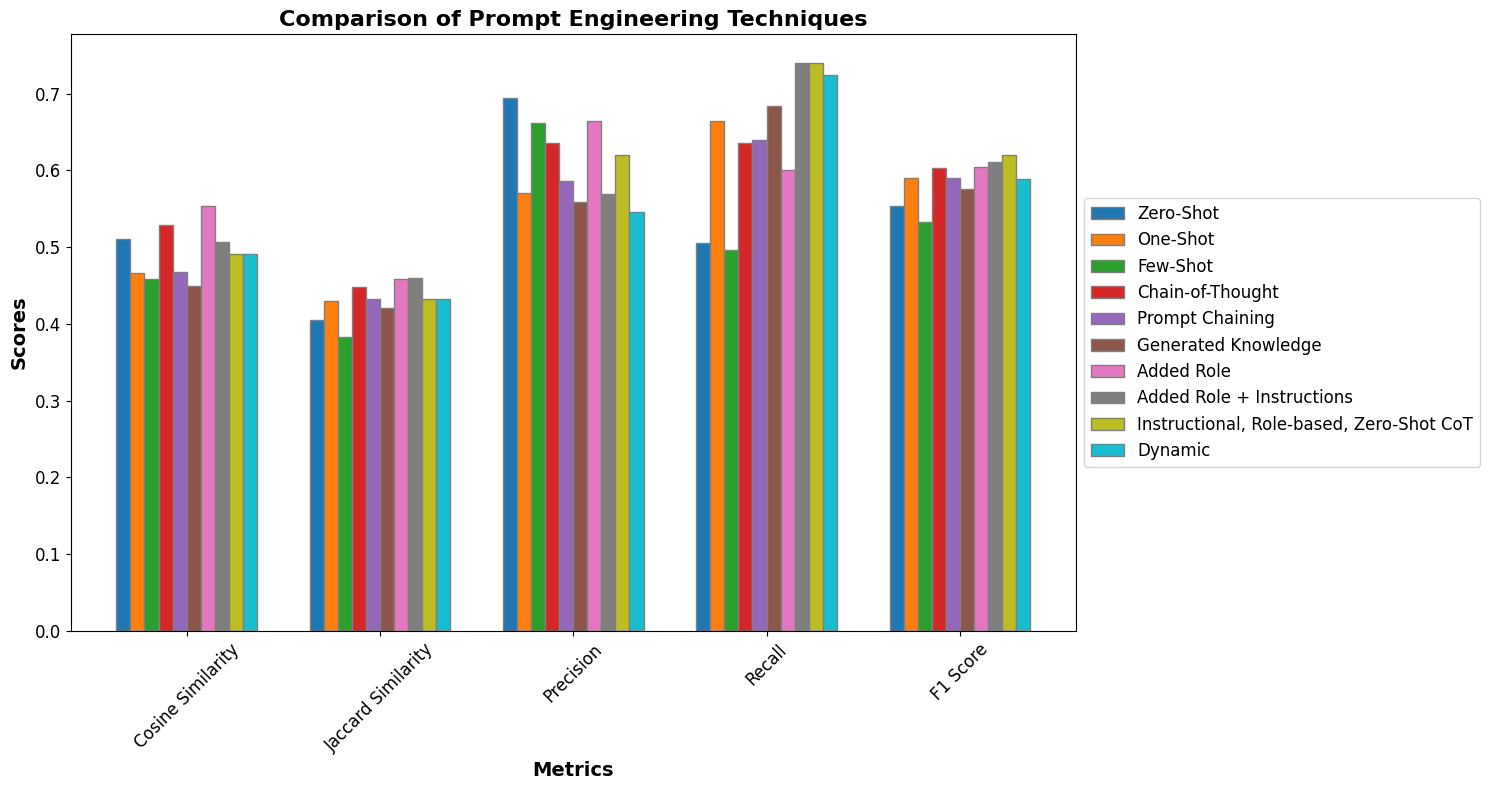

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ["Cosine Similarity", "Jaccard Similarity", "Precision", "Recall", "F1 Score"]

# Define the techniques and their corresponding values
techniques = {
    "Zero-Shot": [0.5105, 0.4053, 0.6940, 0.5053, 0.5541],
    "One-Shot": [0.4658, 0.4294, 0.5702, 0.6640, 0.5906],
    "Few-Shot": [0.4584, 0.3823, 0.6617, 0.4967, 0.5326],
    "Chain-of-Thought": [0.5286, 0.4483, 0.6355, 0.6359, 0.6030],
    "Prompt Chaining": [0.4682, 0.4321, 0.5857, 0.6401, 0.5896],
    "Generated Knowledge": [0.4492, 0.4212, 0.5584, 0.6834, 0.5755],
    "Added Role": [0.5533, 0.4590, 0.6639, 0.6009, 0.6038],
    "Added Role + Instructions": [0.5062, 0.4602, 0.5689, 0.7402, 0.6115],
    "Instructional, Role-based, Zero-Shot CoT": [0.4913, 0.4322, 0.6205, 0.7398, 0.6200],
    "Dynamic": [0.4913, 0.4322, 0.5459, 0.7245, 0.5881]
}

# Number of techniques
num_techniques = len(techniques)

# Set the bar width and the space between groups of bars
bar_width = 0.08
group_space = 0.3

# Set positions of the bars on the x-axis with space between groups
r = np.arange(len(metrics)) * (bar_width * num_techniques + group_space)

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 8))

for i, (technique, values) in enumerate(techniques.items()):
    ax.bar(r + i * bar_width, values, width=bar_width, edgecolor='grey', label=technique)

# Add labels with increased font size
ax.set_xlabel('Metrics', fontweight='bold', fontsize=14)
ax.set_ylabel('Scores', fontweight='bold', fontsize=14)
ax.set_title('Comparison of Prompt Engineering Techniques', fontweight='bold', fontsize=16)
ax.set_xticks(r + bar_width * (num_techniques - 1) / 2)
ax.set_xticklabels(metrics, fontsize=12)

# Increase the font size of the y-ticks
ax.tick_params(axis='y', labelsize=12)

# Place the legend outside the plot with increased font size
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Show the plot with the x-ticks rotated and tight layout
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


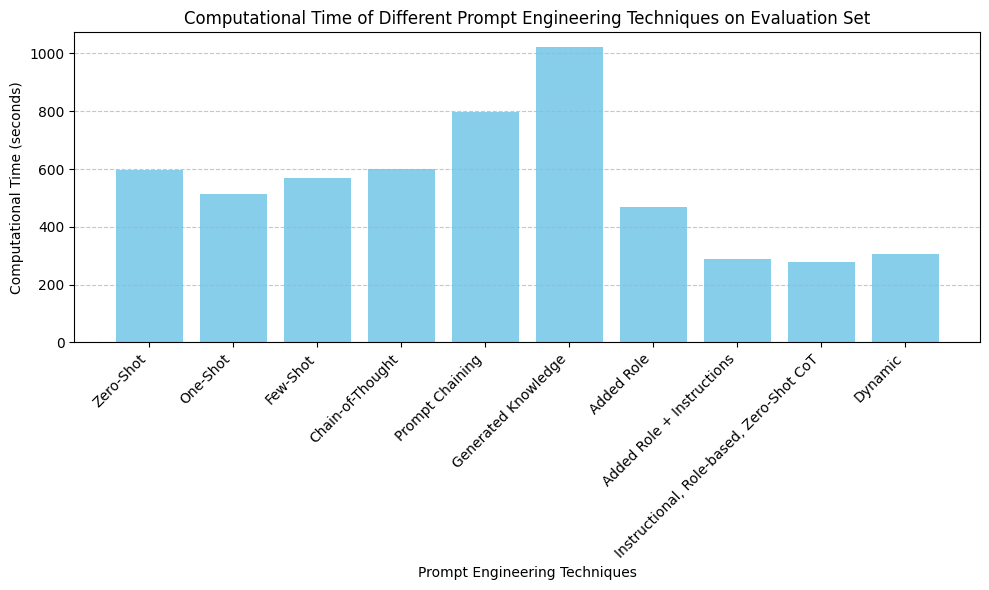

In [ ]:
import matplotlib.pyplot as plt

# Data
techniques = [
    "Zero-Shot",
    "One-Shot",
    "Few-Shot",
    "Chain-of-Thought",
    "Prompt Chaining",
    "Generated Knowledge",
    "Added Role",
    "Added Role + Instructions",
    "Instructional, Role-based, Zero-Shot CoT",
    "Dynamic"
]
times = [
    597,
    512,
    569,
    601,
    798,
    1022,
    470,
    290,
    279,
    306
]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(techniques, times, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prompt Engineering Techniques')
plt.ylabel('Computational Time (seconds)')
plt.title('Computational Time of Different Prompt Engineering Techniques on Evaluation Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


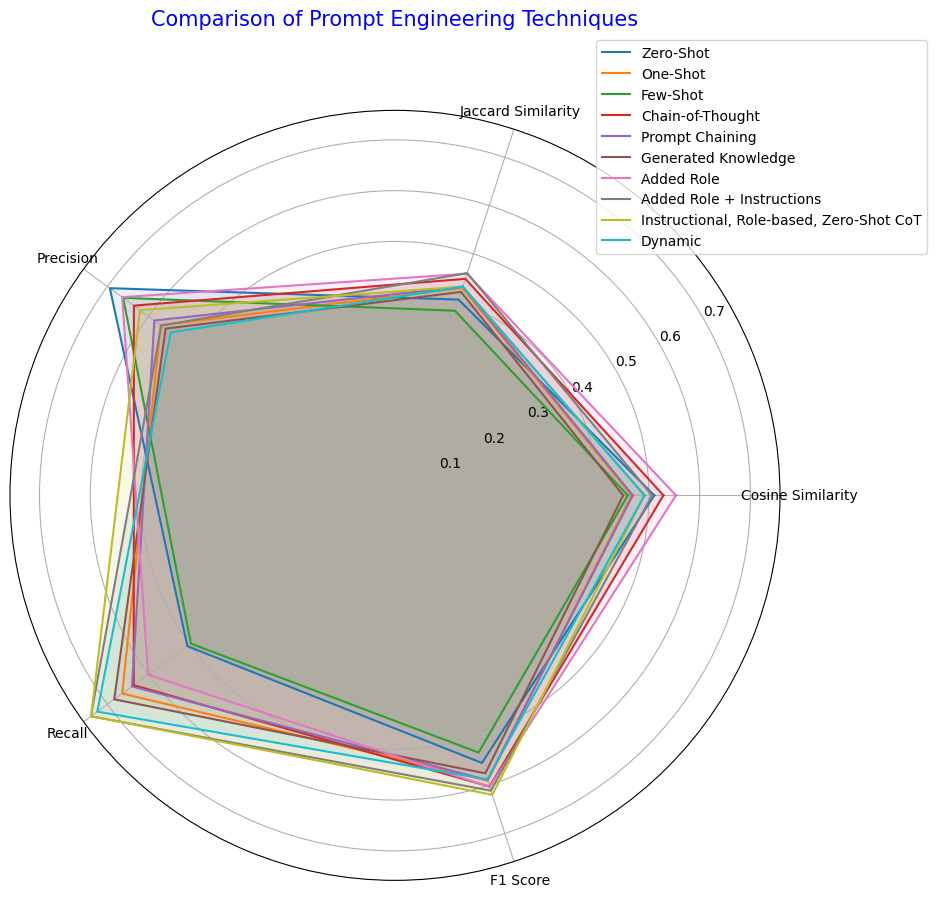

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ["Cosine Similarity", "Jaccard Similarity", "Precision", "Recall", "F1 Score"]
num_metrics = len(metrics)

# Define the techniques and their corresponding values
techniques = {
    "Zero-Shot": [0.5105, 0.4053, 0.6940, 0.5053, 0.5541],
    "One-Shot": [0.4658, 0.4294, 0.5702, 0.6640, 0.5906],
    "Few-Shot": [0.4584, 0.3823, 0.6617, 0.4967, 0.5326],
    "Chain-of-Thought": [0.5286, 0.4483, 0.6355, 0.6359, 0.6030],
    "Prompt Chaining": [0.4682, 0.4321, 0.5857, 0.6401, 0.5896],
    "Generated Knowledge": [0.4492, 0.4212, 0.5584, 0.6834, 0.5755],
    "Added Role": [0.5533, 0.4590, 0.6639, 0.6009, 0.6038],
    "Added Role + Instructions": [0.5062, 0.4602, 0.5689, 0.7402, 0.6115],
    "Instructional, Role-based, Zero-Shot CoT": [0.4913, 0.4322, 0.6205, 0.7398, 0.6200],
    "Dynamic": [0.4913, 0.4322, 0.5459, 0.7245, 0.5881]
}

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The radar chart needs a closed loop, so append the start to the end.
angles += angles[:1]

# Create the radar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each technique
for technique, values in techniques.items():
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=technique)
    ax.fill(angles, values, alpha=0.1)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_rlabel_position(30)
ax.set_title('Comparison of Prompt Engineering Techniques', size=15, color='blue', y=1.1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Show the plot
plt.show()


# Testing LLM ensemble techniques


## Ensemble Averaging with Majority Voting (EAMV)

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random

# Start timing
start_time = time.time()

# Set the models and the number of bootstrap samples
model_ids = ["gemma2", "llama3", "mistral"]
n_estimators = 3

# Initialize multiple versions of the different models
models = [Ollama(model=model_id) for model_id in model_ids]

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)  # Debug print

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def majority_voting(outputs):
    """ Function to perform majority voting among the model outputs. """
    output_counts = Counter(outputs)
    return output_counts.most_common(1)[0][0]


# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path, models)

        # Save results to the file
        output_file_path = r'/content/AA_bagging.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [Pittsburgh, Pennsylvania] ownerships: [ALCOA CORP ORATION] commodities: [] relationships: []",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casting facilities] locations: [nine countries on six continents] ownerships: [Alcoa Corporation, Alcoa World Alumina and Chemicals (a global, unincorporated joint venture between Alcoa and Alumina Limited)] commodities: [bauxite, alumina, aluminum] relationships: [asset: bauxite mines, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina refineries, location: nine countries on six continents, ownership: Alcoa World Alumina and Chemicals, commodity: alumina], [asset: aluminum smelters, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum], [asset: casting facilities, location: nine countries on six continents, ownership: Alcoa Corporation, commodity: aluminum]",
    "physical assets: [mining assets, refining assets, smelting capacity, aluminum smelter, bauxite mines, alumina refineries] locations: [seven countries] ownerships: [Alcoa Corporation and Alumina Limited] commodities: [aluminum, bauxite, alumina] relationships: [asset: mining assets, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: bauxite], [asset: refining assets, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: alumina], [asset: smelting capacity, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum], [asset: aluminum smelter, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: aluminum], [asset: bauxite mines, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: bauxite], [asset: alumina refineries, location: seven countries, ownership: Alcoa Corporation and Alumina Limited, commodity: alumina]",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, bauxite deposit, mine, refinery, smelter, ocean freight and commercial shipping services, refinery assets] locations: [Australia, Brazil, Guinea, Saudi Arabia, Spain, United States (Texas), Suriname] commodities: [bauxite, alumina, aluminum, ocean freight and commercial shipping services] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] ownerships: ['Ma’aden (74.9% interest in MBAC and MAC joint venture)', 'Alcoa (25.1% interest in MAC)', 'AWAC (25.1% interest in MBAC)', 'Pechiney Reynolds Quebec, Inc.', 'Boké Investment Company (51%)', 'Government of Guinea (49%)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'smelter', location: 'Bécancour, Québec', ownership: 'Alcoa (74.95% through Pechiney Reynolds Quebec, Inc.) and Rio Tinto (25.05% through Pechiney Reynolds Quebec, Inc.)', commodity: 'aluminum'], [asset: 'bauxite mine', location: 'Boké region of Guinea', ownership: 'Boké Investment Company (51%) and Government of Guinea (49%)', commodity: 'bauxite'], [asset: 'refinery', location: 'Brazil', ownership: 'Unincorporated joint venture between Alcoa and Rio Tinto', commodity: 'alumina'], [asset: 'smelter', location: 'Brazil', ownership: 'Unincorporated joint venture between Alcoa and Rio Tinto', commodity: 'aluminum'], [asset: 'casthouse', location: 'Brazil', ownership: 'Unincorporated joint venture between Alcoa and Rio Tinto', commodity: 'aluminum']",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'Sao Marcos River, central Brazil', 'Manicouagan River in the Province of Québec, Canada'] ownerships: [] commodities: ['aluminum', 'calcined coke', 'electricity', 'bauxite', 'alumina'] relationships: [asset: 'refinery', location: '', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), and South32 (36%)', commodity: 'aluminum'], [asset: 'smelter', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: 'aluminum'], [asset: 'casthouse', location: '', ownership: 'Alcoa Alumínio (60%) and South32 (40%)', commodity: 'aluminum'], [asset: 'Strathcona calciner', location: '', ownership: 'Alcoa (39%) and Rio Tinto (61%)', commodity: 'calcined coke'], [asset: 'Barra Grande HPP', location: 'southern Brazil', ownership: 'Alcoa Alumínio (42.2%) and unrelated third parties', commodity: 'electricity'], [asset: 'Estreito HPP', location: 'northern Brazil', ownership: 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%) and unrelated third parties', commodity: 'electricity'], [asset: 'Serra do Facão HPP', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%) and unrelated third parties', commodity: 'electricity'], [asset: 'Manicouagan Power Limited Partnership (Manicouagan)', location: 'Manicouagan River in the Province of Québec, Canada', ownership: 'affiliates of Alcoa and Hydro-Québec', commodity: 'electricity'], [asset: 'McCormick hydroelectric project', location: 'Manicouagan River in the Province of Québec, Canada', ownership: 'Alcoa (40%)', commodity: 'electricity']",
    "physical assets: [bauxite interests, bauxite offtake and supply agreements, alumina refineries, smelter grade alumina shipments, facilities] locations: [Australia, Brazil, Spain, Saudi Arabia] ownerships: [Alcoa Corporation, AWAC, MBAC] commodities: [bauxite, alumina] relationships: [asset: bauxite interests, location: Australia, ownership: Alcoa Corporation, commodity: bauxite], [asset: bauxite offtake and supply agreements, location: N/A, ownership: Alcoa Corporation, commodity: bauxite], [asset: alumina refineries, location: Australia, Brazil, Spain, Saudi Arabia, ownership: Alcoa Corporation, commodity: alumina], [asset: smelter grade alumina shipments, location: N/A, ownership: Alcoa Corporation, commodity: alumina], [asset: facilities, location: Australia, Brazil, Spain, Saudi Arabia, ownership: Alcoa Corporation, commodity: bauxite and alumina]",
    "physical assets: [smelting and casting operations, energy assets, MAC joint venture] locations: [] ownerships: [Alcoa Corporation, MAC joint venture] commodities: [aluminum, electricity] relationships: [asset: smelting and casting operations, location: worldwide, ownership: Alcoa Corporation, commodity: aluminum], [asset: energy assets, location: Brazil, Canada, United States, ownership: Alcoa Corporation, commodity: electricity], [asset: MAC joint venture, location: Saudi Arabia, ownership: Alcoa Corporation (25.1%), MAC, commodity: aluminum]",
    "physical assets: [] locations: [] ownerships: ['Alcoa Corporation'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: [smelters, power plants] locations: [Québec, Massena, New York, Portland, Australia, Western Australia, San Ciprián, Spain, Lista, Norway, Mosjøen, Norway] ownerships: [Alcoa, Hydro-Québec, NYPA, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, workers’ representatives] commodities: [electricity, natural gas, renewable energy] relationships: [asset: smelters, location: Québec, ownership: Alcoa, commodity: electricity], [asset: smelters, location: Massena, New York, ownership: Alcoa, commodity: electricity], [asset: smelters, location: Portland, Australia, ownership: Alcoa, commodity: electricity], [asset: smelters, location: Western Australia, ownership: AofA, commodity: natural gas and electricity], [asset: San Ciprián smelter, location: San Ciprián, Spain, ownership: Alcoa, commodity: electricity], [asset: Lista smelter, location: Lista, Norway, ownership: Alcoa, commodity: electricity], [asset: Mosjøen smelter, location: Mosjøen, Norway, ownership: Alcoa, commodity: electricity]",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery'] locations: ['Iceland', 'Spain', 'South America', 'Fjarðaál smelter', 'San Ciprián refinery', 'Alumar smelter'] ownerships: ['Iceland Landsvirkjun', 'Alcoa', 'Naturgy'] commodities: ['electricity', 'power', 'natural gas'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'San Ciprián refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas'], [asset: 'Alumar smelter', location: 'South America', ownership: 'Alcoa', commodity: 'power']",
    "physical assets: [alumina refineries, bauxite mines] locations: [Australia, Brazil, China, Europe, Guinea, Indonesia, North America, South America] ownerships: [Alcoa, partnerships, third-party customers] commodities: [aluminum, alumina, bauxite] relationships: [asset: alumina refineries, location: Australia, Brazil, China, Europe, Guinea, Indonesia, North America, South America, ownership: Alcoa, commodity: alumina], [asset: bauxite mines, location: Australia, Brazil, Guinea, ownership: Alcoa, partnerships, third-party customers, commodity: bauxite]",
    "physical assets: [Patents, Trademarks] locations: [] ownerships: [Alcoa] commodities: [] relationships: [asset: 'Patents', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'Trademarks', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum'] locations: ['Australia', 'South Australia', 'global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [facilities, equipment, infrastructure] locations: [] ownerships: [] commodities: [aluminum, alumina, bauxite] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: '', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: [] locations: [Australia, Brazil, Canada, Europe, Guinea, Saudi Arabia] ownerships: [] commodities: [aluminum] relationships: []",
    "physical assets: [mining operations, refining and smelting operations, Huntly mine, Willowdale bauxite mines, San Ciprián refinery and smelter operations] locations: [Western Australia, Spain] ownerships: [Company] commodities: [bauxite, alumina, aluminum] relationships: [asset: mining operations, location: Western Australia, ownership: Company, commodity: bauxite], [asset: refining and smelting operations, location: Spain, ownership: Company, commodity: alumina and aluminum], [asset: Huntly mine, location: Western Australia, ownership: Company, commodity: bauxite], [asset: Willowdale bauxite mines, location: Western Australia, ownership: Company, commodity: bauxite], [asset: San Ciprián refinery and smelter operations, location: Spain, ownership: Company, commodity: alumina and aluminum]",
    "physical assets: [facilities, equipment, smelting locations, refining locations] locations: [Western Australia] ownerships: [Company] commodities: [bauxite, alumina, aluminum, energy, carbon products, caustic soda] relationships: [asset: facilities, location: smelting locations, ownership: Company, commodity: bauxite, alumina, aluminum], [asset: equipment, location: refining locations, ownership: Company, commodity: bauxite, alumina, aluminum], [asset: smelting locations, location: Western Australia, ownership: Company, commodity: bauxite, alumina, aluminum], [asset: refining locations, location: smelting locations, ownership: Company, commodity: bauxite, alumina, aluminum]",
    "physical assets: ['facilities', 'bauxite mines', 'alumina refineries', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum']",
    "physical assets: [] locations: [Juruti, Brazil; Australia; United States] ownerships: [] commodities: [aluminum, alumina] relationships: []",
    "physical assets: ['facilities', 'equipment'] locations: ['Massena West (New York)', 'Warrick', 'Australia', 'Brazil', 'Canada', 'Norway'] ownerships: ['AofA'] commodities: ['aluminum', 'critical minerals'] relationships: [asset: 'facilities', location: 'Massena West (New York)', ownership: 'AofA', commodity: 'aluminum'], [asset: 'equipment', location: 'Warrick', ownership: 'AofA', commodity: 'aluminum'], [asset: 'facilities', location: 'Australia', ownership: 'AofA', commodity: 'alumina'], [asset: 'facilities', location: 'Brazil', ownership: 'AofA', commodity: 'alumina'], [asset: 'facilities', location: 'Canada', ownership: 'AofA', commodity: 'alumina'], [asset: 'facilities', location: 'Norway', ownership: 'AofA', commodity: 'alumina']",
    "physical assets: [properties] locations: [Spain] ownerships: [Company] commodities: [] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: '']",
    "physical assets: [facilities, equipment, infrastructure] locations: [United States, Asia, Brazil, Canada, EU, Jarrah Forest, Amazon] ownerships: [Company] commodities: [energy, aluminum, alumina refining products] relationships: [asset: facilities, location: United States, ownership: Company, commodity: energy], [asset: equipment, location: Asia, ownership: Company, commodity: energy], [asset: infrastructure, location: Brazil, ownership: Company, commodity: energy], [asset: facilities, location: Canada, ownership: Company, commodity: aluminum], [asset: equipment, location: EU, ownership: Company, commodity: alumina refining products], [asset: facilities, location: Jarrah Forest, ownership: Company, commodity: aluminum], [asset: infrastructure, location: Amazon, ownership: Company, commodity: alumina refining products]",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [impoundment structures, tailing facilities, residue storage areas, structural impoundments] locations: [] ownerships: [Alcoa] commodities: [] relationships: []",
    "physical assets: [substantially all assets] locations: [Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, Switzerland] ownerships: [Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia, Brazil, Canada, Luxembourg, the Netherlands, Norway, and Switzerland] commodities: [] relationships: [asset: 'substantially all assets', location: 'Australia', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Australia', commodity: ''], [asset: 'substantially all assets', location: 'Brazil', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Brazil', commodity: ''], [asset: 'substantially all assets', location: 'Canada', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Canada', commodity: ''], [asset: 'substantially all assets', location: 'Luxembourg', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Luxembourg', commodity: ''], [asset: 'substantially all assets', location: 'the Netherlands', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in the Netherlands', commodity: ''], [asset: 'substantially all assets', location: 'Norway', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Norway', commodity: ''], [asset: 'substantially all assets', location: 'Switzerland', ownership: 'Company, Borrower, material domestic wholly-owned subsidiaries of the Company, and the material foreign wholly-owned subsidiaries of the Company located in Switzerland', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [information technology systems] locations: [] ownerships: [Company, third-party providers] commodities: [] relationships: [asset: 'information technology systems', location: '', ownership: 'Company', commodity: ''], [asset: 'information technology systems', location: '', ownership: 'third-party providers', commodity: '']"
]



# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## Weighted Majority Voting Ensemble (WMVE)

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random

# Start timing
start_time = time.time()

# Set the models and the number of bootstrap samples
model_ids = ["gemma2", "llama3", "mistral"]
n_estimators = 3

# Initialize multiple versions of the different models
models = [Ollama(model=model_id) for model_id in model_ids]

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def weighted_majority_voting(outputs, weights):
    """ Function to perform weighted majority voting among the model outputs. """
    weighted_votes = Counter()
    for output, weight in zip(outputs, weights):
        weighted_votes[output] += weight
    return weighted_votes.most_common(1)[0][0]

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path, models)

        # Save results to the file
        output_file_path = r'/content/AA_boosting.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelters', 'casting facilities'] locations: ['across nine countries on six continents'] ownerships: ['Alcoa Corporation directly and indirectly owns 27 locations'] commodities: ['aluminum', 'alumina'] relationships: [asset: 'bauxite mines', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum smelters', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'casting facilities', location: 'across nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining capacity', 'smelting capacity', 'bauxite mines', 'alumina refineries', 'aluminum smelter'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'mining operations', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'refining capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'smelting capacity', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited', commodity: 'alumina']",
    "physical assets: [] locations: ['Brazil', 'Guinea', 'Australia', 'Saudi Arabia', 'Spain', 'United States', 'Suriname'] ownerships: ['Alcoa Corporation owns 60%', 'Alumina Limited owns 40% of AWAC', 'Alcoa’s affiliate, Alcoa of Australia Limited (AofA) owns the assets mentioned above'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: ['Ma’aden owns a 74.9% interest in the MBAC and MAC joint venture', 'Alcoa owns a 25.1% interest in MAC', 'AWAC holds a 25.1% interest in MBAC', 'Alcoa owns 74.95% of ABI through its 50% equity investment in Pechiney Reynolds Quebec, Inc.', 'Rio Tinto owns the remaining 25.05% interest in ABI', 'Boké Investment Company (51%) and the Government of Guinea (49%) for the operation of a bauxite mine'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'Province of Québec, Canada', 'central Brazil'] ownerships: [] commodities: ['aluminum', 'calcined coke', 'electricity', 'bauxite', 'alumina'] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'facilities'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia'] ownerships: ['Alcoa Corporation', 'AWAC (joint venture)'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'alumina refineries', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'alumina refineries', location: 'Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Saudi Arabia', ownership: 'MBAC (joint venture)', commodity: 'bauxite']",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Baie-Comeau (Canada)', 'Warrick (Indiana)', 'Brazilian refineries', 'Saudi Arabia', 'Australia', 'Portland', 'Poços de Caldas', 'São Luís', 'Quebéc', 'Iceland', 'Fjarðaál', 'Norway', 'Lista', 'Mosjøen', 'Spain', 'San Ciprián', 'Massena West, NY', 'Evansville, IN'] ownerships: ['Alcoa Corporation', 'MAC (joint venture company in Saudi Arabia)'] commodities: ['primary aluminum', 'molten primary aluminum', 'electricity'] relationships: [asset: 'worldwide smelting and casthouse system', location: 'global', ownership: 'Alcoa Corporation', commodity: 'primary aluminum'], [asset: 'portfolio of energy assets in Brazil, Canada, and the United States', location: 'Brazil, Canada, and the United States', ownership: 'Alcoa Corporation', commodity: 'electricity'], [asset: 'smelting operations', location: 'global', ownership: 'Alcoa Corporation', commodity: 'molten primary aluminum'], [asset: 'casting operations', location: 'global', ownership: 'Alcoa Corporation', commodity: 't-bar, sow, standard ingot, foundry, billet, rod, and slab'], [asset: 'primary aluminum facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'primary aluminum'], [asset: 'global smelting capacity', location: 'global', ownership: 'Alcoa Corporation', commodity: 'primary aluminum']",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation'] commodities: ['aluminum', 'electricity'] relationships: []",
    "physical assets: ['smelters', 'power grids', 'refineries', 'calcination furnaces'] locations: ['Québec', 'Massena (New York)', 'Australia (Portland)', 'Western Australia (Kwinana, Pinjarra, Wagerup)', 'Europe (San Ciprián, Spain)', 'Norway (Lista, Mosjøen)'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'National Electricity Market (NEM)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd', 'workers’ representatives'] commodities: ['electricity', 'natural gas', 'renewable energy'] relationships: [asset: 'smelters', location: 'Québec', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Massena (New York)', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Australia (Portland)', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'AofA', commodity: 'natural gas'], [asset: 'calcination furnaces', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'AofA', commodity: 'natural gas'], [asset: 'smelters', location: 'Europe (San Ciprián, Spain)', ownership: 'Alcoa', commodity: 'electricity'], [asset: 'smelters', location: 'Norway (Lista, Mosjøen)', ownership: 'Alcoa', commodity: 'electricity']",
    "physical assets: ['hydroelectric facility', 'smelter', 'refinery'] locations: ['Iceland', 'Spain'] ownerships: ['Iceland Landsvirkjun', 'Alcoa'] commodities: ['electricity', 'power', 'natural gas'] relationships: [asset: 'hydroelectric facility', location: 'Iceland', ownership: 'Iceland Landsvirkjun', commodity: 'electricity'], [asset: 'smelter', location: 'Iceland', ownership: 'Alcoa', commodity: 'power'], [asset: 'refinery', location: 'Spain', ownership: 'Alcoa', commodity: 'natural gas']",
    "physical assets: ['refineries', 'bauxite mines', 'casthouses'] locations: ['Australia', 'Brazil', 'China', 'Europe', 'Guinea', 'Indonesia', 'North America', 'South America', 'the Middle East'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'refineries', location: 'Australia, Brazil, China, Europe, Guinea, Indonesia, North America, South America, the Middle East', ownership: '', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: '', commodity: 'bauxite'], [asset: 'casthouses', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['patents', 'trademarks'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: [asset: 'patent', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'trademark', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: [] ownerships: ['Alcoa Corporation'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum assets'] locations: ['Australia', 'South Australia'] ownerships: ['Alcoa Corporation'] commodities: ['aluminum', 'bauxite', 'alumina'] relationships: [asset: 'bauxite', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'aluminum assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum'], [asset: 'equipment', location: '', ownership: '', commodity: 'aluminum'], [asset: 'infrastructure', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['aluminum', 'bauxite'] relationships: [asset: 'mining operations', location: 'Australia', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Europe', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Guinea', ownership: 'Company', commodity: 'bauxite'], [asset: 'mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'sites', 'Huntly mine', 'Willowdale bauxite mines', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'electricity', 'natural gas', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: '', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: '', ownership: 'Company', commodity: 'aluminum'], [asset: 'sites', location: 'near mining areas', ownership: 'Company', commodity: ''], [asset: 'Huntly mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mines', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['facilities', 'equipment', 'refining locations', 'smelting locations', 'mining operations'] locations: [] ownerships: ['Company', 'suppliers', 'vendors', 'customers'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda', 'raw materials', 'freight costs'] relationships: [asset: 'facilities', location: 'refining locations', ownership: 'Company', commodity: 'alumina'], [asset: 'equipment', location: 'smelting locations', ownership: 'Company', commodity: 'aluminum'], [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['seven countries'] ownerships: ['Alcoa', 'Alumina Limited', 'Saudi Arabian Mining Company (Ma’aden)'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'facilities', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'bauxite'], [asset: 'equipment', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'alumina'], [asset: 'infrastructure', location: 'seven countries', ownership: 'Alcoa and Alumina Limited', commodity: 'aluminum']",
    "physical assets: [] locations: [] ownerships: [] commodities: ['aluminum', 'alumina'] relationships: []",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York', 'USA'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: 'USA', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: ['properties', 'facilities'] locations: [] ownerships: ['Company'] commodities: ['energy'] relationships: [asset: 'properties', location: 'Spain', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: '', ownership: 'Company', commodity: 'energy']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum', 'copper', 'gold', 'electricity', 'renewable energy'] relationships: [asset: 'facilities', location: 'United States', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: 'Asia', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: 'Brazil', ownership: 'Company', commodity: 'energy'], [asset: 'facilities', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'equipment', location: 'EU', ownership: 'Company', commodity: 'copper'], [asset: 'infrastructure', location: 'Jarrah Forest', ownership: 'Company', commodity: 'gold'], [asset: 'facilities', location: 'Amazon', ownership: 'Company', commodity: 'electricity']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: []",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]


# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."


# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


## Stacking Ensemble with Meta-Learning (SEML)

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import numpy as np

# Start timing
start_time = time.time()

# Set Ollama models
model_ids = ["gemma2", "mistral", "llama3"]

# Initialize instances of the Ollama models
models = {model_id: Ollama(model=model_id) for model_id in model_ids}

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def train_meta_learner(base_outputs, targets):
    """ Function to train the meta-learner. """
    vectorizer = CountVectorizer()
    label_encoder = LabelEncoder()
    meta_learner = make_pipeline(vectorizer, LogisticRegression())

    # Encode the targets
    encoded_targets = label_encoder.fit_transform(targets)

    # Flatten base_outputs to a list of strings
    base_outputs_flattened = [" ".join(map(str, output)) for output in base_outputs]

    # Train the meta-learner
    meta_learner.fit(base_outputs_flattened, encoded_targets)

    return meta_learner, label_encoder

def meta_predict(meta_learner, label_encoder, base_outputs):
    """ Function to use the meta-learner for predictions. """
    # Flatten base_outputs to a list of strings
    base_outputs_flattened = [" ".join(map(str, output)) for output in base_outputs]

    encoded_predictions = meta_learner.predict(base_outputs_flattened)
    return label_encoder.inverse_transform(encoded_predictions)

def process_document_chunks(db_path, models, train_meta=True):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    base_outputs = []
    targets = []

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 2 chunks
            if chunk_id >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            chunk_outputs = [query_chunk(chunk, model) for model in models.values()]
            base_outputs.append(chunk_outputs)

            targets.append(chunk_outputs[0])

    if train_meta:
        meta_learner, label_encoder = train_meta_learner(base_outputs, targets)
        return meta_learner, label_encoder
    else:
        return base_outputs

def main_process(db_path):
    meta_learner, label_encoder = process_document_chunks(db_path, models, train_meta=True)

    # Use the trained meta-learner for predictions
    base_outputs = process_document_chunks(db_path, models, train_meta=False)
    results = meta_predict(meta_learner, label_encoder, base_outputs)

    return results

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = main_process(db_path)

        # Save results to the file
        output_file_path = r'/content/AA_stacking.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if len(results) > 0:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Preparation
ground_truth_chunks = [
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelting and casting facilities, energy production assets] locations: [27 locations across nine countries on six continents] ownerships: [direct and indirect ownership by Alcoa Corporation] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelting and casting facilities', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy production assets', location: '27 locations across nine countries on six continents', ownership: 'direct and indirect ownership by Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelter, renewable energy sources] locations: [seven countries, unspecified locations for renewable energy sources] ownerships: [Alcoa Corporation, Alumina Limited through AWAC joint venture] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'renewable energy sources', location: 'unspecified locations', ownership: 'Alcoa Corporation', commodity: 'aluminum production']",
    "physical assets: [bauxite mining operations, alumina refining operations, aluminum smelting operations, ocean freight and commercial shipping services assets, closed refinery facility, assets formerly used for mining and refining] locations: [Australia, Brazil, Guinea, Spain, Texas (USA), Suriname, Saudi Arabia] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations', location: 'Juruti, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite'] [asset: 'bauxite mining operations', location: 'Guinea', ownership: 'Halco (Mining) Inc.', commodity: 'bauxite'] [asset: 'alumina refining operations', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'aluminum smelting operations', location: 'Portland, Australia', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'aluminum'] [asset: 'bauxite mining operations and alumina refining operations', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Alcoa Corporation and Saudi Arabian Mining Company (Ma’aden)', commodity: 'bauxite, alumina'] [asset: 'alumina refining and alumina-based chemicals assets', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina'] [asset: 'ocean freight and commercial shipping services assets', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'services'] [asset: 'closed refinery facility', location: 'Point Comfort, Texas, USA', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'alumina (previously)'] [asset: 'assets formerly used for mining and refining', location: 'Suriname', ownership: 'Alcoa Corporation and Alumina Limited through AWAC joint venture', commodity: 'bauxite, alumina (previously)']",
    "physical assets: [bauxite mine, alumina refinery, aluminum smelter, technology for aluminum smelting, smelter, refinery, casthouse] locations: [Ras Al Khair (Saudi Arabia), Bécancour (Québec, Canada), Boké region (Guinea), Brazil] ownerships: [Alcoa Corporation, Alumina Limited, Ma’aden, Rio Tinto Alcan Inc., Investissement Québec, Government of Québec, Government of Guinea, Boké Investment Company, Halco (Mining) Inc.] commodities: [bauxite, alumina, aluminum, technology] relationships: [asset: 'bauxite mine', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Aluminium Company (MAC), Alcoa Corporation', commodity: 'aluminum'] [asset: 'technology for aluminum smelting', location: 'Québec, Canada', ownership: 'ELYSIS (Alcoa, Rio Tinto, Investissement Québec)', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Aluminerie de Bécancour Inc. (ABI) - Alcoa and Rio Tinto', commodity: 'aluminum'] [asset: 'bauxite mine', location: 'Boké region, Guinea', ownership: 'Compagnie des Bauxites de Guinée (CBG) - Halco (Mining) Inc., Government of Guinea', commodity: 'bauxite'] [asset: 'refinery', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'alumina'] [asset: 'smelter', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum'] [asset: 'casthouse', location: 'Brazil', ownership: 'Alumar - Alcoa', commodity: 'aluminum']",
    "physical assets: [refinery, smelter, casthouse, calciner, hydropower plants, mines] locations: [Brazil (Pelotas River, Tocantins River, Sao Marcos River), Québec (Canada), unspecified locations for refineries, smelters, and casthouse] ownerships: [AWAB (part of AWAC), Rio Tinto, Alcoa Alumínio, South32, Alcoa Corporation, Hydro-Québec] commodities: [alumina, aluminum, calcined coke, hydropower, bauxite] relationships: [asset: 'refinery', location: 'unspecified', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'casthouse', location: 'unspecified', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'] [asset: 'calciner', location: 'unspecified', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'] [asset: 'Machadinho Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (27.3%)', commodity: 'hydropower'] [asset: 'Barra Grande Hydro Power Plant', location: 'Pelotas River, southern Brazil', ownership: 'Alcoa Alumínio (42.2%)', commodity: 'hydropower'] [asset: 'Estreito Hydro Power Plant', location: 'Tocantins River, northern Brazil', ownership: 'Alcoa Alumínio through Estreito Energia S.A. (25.5%)', commodity: 'hydropower'] [asset: 'Serra do Facão Hydro Power Plant', location: 'Sao Marcos River, central Brazil', ownership: 'Alcoa Alumínio (35%)', commodity: 'hydropower'] [asset: 'McCormick hydroelectric project', location: 'Manicouagan River, Québec, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'hydropower'] [asset: 'mines', location: 'unspecified', ownership: 'Alcoa-operated mines and partnerships (including AWAC)', commodity: 'bauxite']",
    "physical assets: [bauxite mines, alumina refineries, smelter] locations: [Australia (Kwinana, Pinjarra, Wagerup), Brazil (Poços de Caldas, São Luís), Spain (San Ciprián), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto] commodities: [bauxite, alumina] relationships: [asset: 'bauxite mines', location: 'unspecified', ownership: 'Alcoa Corporation and partnerships', commodity: 'bauxite'] [asset: 'alumina refinery', location: 'Kwinana, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Pinjarra, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Wagerup, Australia', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation through AWAC, South32', commodity: 'alumina'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation through AWAC', commodity: 'alumina'] [asset: 'alumina refinery', location: 'Ras Al Khair, Saudi Arabia', ownership: 'Ma’aden Bauxite and Alumina Company (MBAC), AWAC', commodity: 'alumina'] [asset: 'smelter', location: 'unspecified', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [smelters, casthouses, energy assets] locations: [Australia (Portland), Brazil (Poços de Caldas, São Luís), Canada (Baie Comeau, Bécancour, Deschambault), Iceland (Fjarðaál), Norway (Lista, Mosjøen), Spain (San Ciprián), United States (Massena West, NY; Warrick, IN), Saudi Arabia (Ras Al Khair)] ownerships: [Alcoa Corporation, MAC (Ma’aden Aluminium Company), AWAC, Rio Tinto] commodities: [aluminum, energy] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouse', location: 'Poços de Caldas, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'São Luís, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Baie Comeau, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Bécancour, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Deschambault, Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena West, NY, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, IN, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Ras Al Khair, Saudi Arabia', ownership: 'MAC (Ma’aden Aluminium Company), AWAC', commodity: 'aluminum'] [asset: 'energy assets', location: 'Brazil, Canada, United States', ownership: 'Alcoa Corporation', commodity: 'energy']",
    "physical assets: [smelters, energy facilities, Liberty Mine] locations: [Australia (Portland), Spain (San Ciprián), USA (Intalco, Warrick), Brazil (Barra Grande, Estreito, Machadinho, Serra do Facão), Canada (Manicouagan)] ownerships: [Alcoa Corporation, AWAC, South32, Rio Tinto, Government stakeholders] commodities: [aluminum, energy, coal] relationships: [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Intalco, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power plant', location: 'Barra Grande, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Estreito, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Machadinho, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Serra do Facão, Brazil', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'hydroelectric power plant', location: 'Manicouagan, Canada', ownership: 'Manicouagan Power Limited Partnership (Alcoa 40%, Hydro-Québec 60%)', commodity: 'energy'] [asset: 'coal-fired power plant', location: 'Warrick, USA', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'coal mine', location: 'Liberty Mine, USA', ownership: 'Alcoa Corporation', commodity: 'coal']",
    "physical assets: [smelters, alumina refineries, power generation facilities] locations: [Québec (Canada), Massena (New York, USA), Portland (Australia), Western Australia (Kwinana, Pinjarra, Wagerup), San Ciprián (Spain), Lista (Norway), Mosjøen (Norway)] ownerships: [Alcoa Corporation, AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd, New York Power Authority, Hydro-Québec] commodities: [aluminum, electricity, natural gas] relationships: [asset: 'smelter', location: 'Québec, Canada', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Massena, New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Portland, Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'Western Australia (Kwinana, Pinjarra, Wagerup)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Lista, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'smelter', location: 'Mosjøen, Norway', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'power generation facilities', location: 'Québec, Canada', ownership: 'Hydro-Québec', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Massena, New York, USA', ownership: 'New York Power Authority', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Portland, Australia', ownership: 'AGL Hydro Partnership, Origin Energy Electricity Limited, Alinta Energy CEA Trading Pty Ltd', commodity: 'electricity'] [asset: 'power generation facilities', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'natural gas']",
    "physical assets: [smelters, alumina refineries, hydroelectric power facility] locations: [Iceland (Fjarðaál), Spain (San Ciprián), Brazil (Alumar)] ownerships: [Alcoa Corporation, Landsvirkjun] commodities: [aluminum, electricity, natural gas, bauxite, caustic soda, calcined petroleum coke, lime, aluminum fluoride, cathode blocks, liquid pitch] relationships: [asset: 'smelter', location: 'Fjarðaál, Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'hydroelectric power facility', location: 'Iceland', ownership: 'Landsvirkjun', commodity: 'electricity'] [asset: 'alumina refinery', location: 'San Ciprián, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelter', location: 'Alumar, Brazil', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, casthouses, renewable energy sources (hydropower)] locations: [Australia, Brazil, Guinea, Europe (San Ciprián, Spain), Iceland (Fjarðaál), North America, South America, the Middle East, China] ownerships: [Alcoa Corporation, Rio Tinto, South32, Hangzhou Jinjiang Group, Norsk Hydro ASA, Emirates Global Aluminum, Century Aluminum, Vedanta Aluminum Ltd.] commodities: [bauxite, alumina, aluminum, recycled aluminum (EcoDura), low-carbon aluminum (EcoLum), low-carbon alumina (EcoSource)] relationships: [asset: 'bauxite mines', location: 'Australia, Brazil, Guinea', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'Australia, Brazil, Spain (San Ciprián)', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'casthouses', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'renewable energy sources (hydropower)', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy'] [asset: 'Fjarðaál smelter', location: 'Iceland', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'EcoDura aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'recycled aluminum'] [asset: 'EcoLum aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon aluminum'] [asset: 'EcoSource alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'low-carbon alumina']",
    "physical assets: [tailings storage facilities] locations: [global] ownerships: [Alcoa Corporation] commodities: [none applicable] relationships: [asset: 'tailings storage facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'none applicable']",
    "physical assets: [none applicable] locations: [17 countries including the U.S., Europe, Canada, South America, and Australia] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [corporate offices, global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global operations] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite]",
    "physical assets: [none applicable] locations: [global] ownerships: [none applicable] commodities: [aluminum, alumina, bauxite, energy]",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters, energy supplies] locations: [global, specific mentions of Huntly and Willowdale (Western Australia), San Ciprián (Spain)] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity)] relationships: [asset: 'bauxite mines', location: 'Huntly and Willowdale, Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of Western Australia] ownerships: [Alcoa Corporation] commodities: [bauxite, alumina, aluminum, energy (natural gas, electricity), carbon products, caustic soda] relationships: [asset: 'bauxite mines', location: 'Western Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'energy supplies', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (natural gas, electricity)'] [asset: 'raw materials', location: 'global', ownership: 'Alcoa Corporation', commodity: 'carbon products, caustic soda, bauxite']",
    "physical assets: [bauxite mines, alumina refineries, aluminum smelters] locations: [global, specific mention of AWAC joint venture in seven countries] ownerships: [Alcoa Corporation, Alumina Limited, Saudi Arabian Mining Company (Ma’aden)] commodities: [bauxite, alumina, aluminum] relationships: [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'bauxite'] [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'alumina'] [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC (Alcoa Corporation and Alumina Limited)', commodity: 'aluminum'] [asset: 'aluminum smelter', location: 'Saudi Arabia', ownership: 'Alcoa Corporation and Ma’aden', commodity: 'aluminum']",
    "physical assets: [none applicable] locations: [global, specific mentions of Juruti (Brazil), Australia, United States, European Union] ownerships: [none applicable] commodities: [none applicable]",
    "physical assets: [aluminum smelters] locations: [Massena West (New York), Warrick (Indiana), Australia, Brazil, Canada, Norway] ownerships: [Alcoa Corporation] commodities: [aluminum] relationships: [asset: 'Massena West smelter', location: 'New York, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'Warrick smelter', location: 'Indiana, USA', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'AofA (Alcoa of Australia)', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina']",
    "physical assets: [none applicable] locations: [global, specific mentions of Spain] ownerships: [none applicable] commodities: [energy (natural gas), raw materials]",
    "physical assets: [aluminum smelters, alumina refineries, energy-intensive assets] locations: [global, specific mentions of Jarrah Forest (Australia), Amazon (Brazil), United States, Asia, Brazil, Canada, EU] ownerships: [Alcoa Corporation] commodities: [aluminum, alumina, energy (fossil fuels), carbon credits] relationships: [asset: 'aluminum smelters', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum'] [asset: 'alumina refineries', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'] [asset: 'energy-intensive assets', location: 'global', ownership: 'Alcoa Corporation', commodity: 'energy (fossil fuels)'] [asset: 'Jarrah Forest', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite mining'] [asset: 'Amazon', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite mining']",
    "physical assets: [none applicable] locations: [global, specific mentions of United States, Asia, Brazil, Canada, EU] ownerships: [none applicable] commodities: [energy sources, carbon credits]",
    "physical assets: [tailing facilities, residue storage areas, structural impoundments] locations: [global] ownerships: [Alcoa Corporation] commodities: [hazardous waste, byproducts] relationships: [asset: 'tailing facilities', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'residue storage areas', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste'] [asset: 'structural impoundments', location: 'global', ownership: 'Alcoa Corporation', commodity: 'hazardous waste']",
    "physical assets: [none applicable] locations: [global, specific mentions of Australia, Brazil, Canada, Luxembourg, Netherlands, Norway, Switzerland] ownerships: [Alcoa Corporation, Alcoa Nederland Holding B.V. (ANHBV)] commodities: [none applicable]",
    "physical assets: [none applicable] locations: [global, specific mentions of Delaware] ownerships: [Alcoa Corporation] commodities: [none applicable]",
    "physical assets: [None] locations: [None] ownerships: [None] commodities: [None] relationships: [None]"
]


output_1_chunks = [
    "physical assets: [] locations: ['Pittsburgh, Pennsylvania'] ownerships: ['ALCOA CORPORATION'] commodities: [] relationships: []",
    "physical assets: ['bauxite mines', 'alumina refineries', 'aluminum smelting and casting facilities', 'energy production assets'] locations: ['nine countries on six continents'] ownerships: ['Alcoa Corporation', 'Alcoa World Alumina and Chemicals (joint venture between Alcoa and Alumina Limited)'] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'bauxite mines', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'alumina refineries', location: 'nine countries on six continents', ownership: 'Alcoa Corporation and Alumina Limited (through Alcoa World Alumina and Chemicals)', commodity: 'alumina'], [asset: 'aluminum smelting and casting facilities', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'energy production assets', location: 'nine countries on six continents', ownership: 'Alcoa Corporation', commodity: 'electricity']",
    "physical assets: ['mining', 'refining', 'smelting assets', 'aluminum smelter', 'bauxite mines', 'alumina refineries'] locations: ['seven countries'] ownerships: ['Alcoa Corporation', 'Alumina Limited'] commodities: ['aluminum', 'bauxite', 'alumina'] relationships: [asset: 'mining', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'refining', location: '', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelting assets', location: '', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum'], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina']",
    "physical assets: ['bauxite mining operations', 'alumina refining operations', 'aluminum smelting operations', 'bauxite deposit and mine', 'bauxite consortium', 'refinery', 'smelter', 'refinery assets', 'mine and refinery', 'refinery and alumina-based chemicals assets', 'ocean freight and commercial shipping services company'] locations: ['Australia', 'Brazil', 'Guinea', 'Saudi Arabia', 'Spain', 'United States', 'Suriname'] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite mining operations', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refining operations', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum smelting operations', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'aluminum'], [asset: 'bauxite deposit and mine', location: 'Brazil', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'refinery', location: 'Brazil', ownership: 'Alumina Limited', commodity: 'alumina'], [asset: 'smelter', location: 'Australia', ownership: 'AWAC joint venture partners', commodity: 'aluminum'], [asset: 'refinery assets', location: 'Texas, United States', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'mine and refinery', location: 'Saudi Arabia', ownership: 'AWAC joint venture partners', commodity: 'bauxite and alumina'], [asset: 'refinery and alumina-based chemicals assets', location: 'Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'ocean freight and commercial shipping services company', location: 'N/A', ownership: 'Alcoa Corporation', commodity: 'N/A']",
    "physical assets: ['bauxite mine', 'alumina refinery', 'aluminum smelter'] locations: [] ownerships: [] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: []",
    "physical assets: [] locations: ['southern Brazil', 'northern Brazil', 'Province of Québec, Canada', 'central Brazil'] ownerships: ['AWAB (39.96%)', 'Rio Tinto (10%)', 'Alcoa Alumínio (14.04%)', 'South32 (36%)', 'Alcoa (60%)', 'Alumina Limited (40%)', 'Alcoa Alumínio (60%)', 'South32 (40%)', 'affiliates of Alcoa and Rio Tinto', 'Alcoa (39%)', 'Rio Tinto (61%)', 'Alcoa Alumínio (27.3%)', 'unrelated third parties', 'Alcoa Alumínio (42.2%)', 'unrelated third parties', 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%)', 'unrelated third parties', 'Alcoa Alumínio (35%)', 'unrelated third parties', 'affiliates of Alcoa and Hydro-Québec', 'Alcoa (40%)'] commodities: ['aluminum', 'calcined coke', 'electricity', 'bauxite', 'alumina'] relationships: [asset: 'refinery', location: 'southern Brazil', ownership: 'AWAB (39.96%), Rio Tinto (10%), Alcoa Alumínio (14.04%), South32 (36%)', commodity: 'aluminum'], [asset: 'smelter', location: 'southern Brazil', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'], [asset: 'casthouse', location: 'southern Brazil', ownership: 'Alcoa Alumínio (60%), South32 (40%)', commodity: 'aluminum'], [asset: 'strathcona calciner', location: 'northern Brazil', ownership: 'Alcoa (39%), Rio Tinto (61%)', commodity: 'calcined coke'], [asset: 'Barra Grande HPP', location: 'southern Brazil', ownership: 'Alcoa Alumínio (42.2%), unrelated third parties', commodity: 'electricity'], [asset: 'Estreito HPP', location: 'northern Brazil', ownership: 'Alcoa Alumínio, through Estreito Energia S.A. (25.5%), unrelated third parties', commodity: 'electricity'], [asset: 'Serra do Facão HPP', location: 'central Brazil', ownership: 'Alcoa Alumínio (35%), unrelated third parties', commodity: 'electricity'], [asset: 'Manicouagan Power Limited Partnership (Manicouagan)', location: 'Province of Québec, Canada', ownership: 'affiliates of Alcoa and Hydro-Québec', commodity: 'electricity'], [asset: 'McCormick hydroelectric project', location: 'Province of Québec, Canada', ownership: 'affiliates of Alcoa and Hydro-Québec', commodity: 'electricity'], [asset: 'mines', location: 'various locations', ownership: 'AWAC, Alcoa, South32, unrelated third parties', commodity: 'bauxite'], [asset: 'bauxite refineries', location: 'various locations', ownership: 'Alcoa, AWAC, unrelated third parties', commodity: 'alumina']",
    "physical assets: ['bauxite interests', 'bauxite offtake and supply agreements', 'alumina refineries', 'smelter grade alumina shipments', 'facilities'] locations: ['Australia', 'Brazil', 'Spain', 'Saudi Arabia'] ownerships: ['Alcoa Corporation', 'AWAC', 'MBAC'] commodities: ['bauxite', 'alumina'] relationships: [asset: 'bauxite interests', location: 'Australia', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'bauxite offtake and supply agreements', location: '', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'Australia, Brazil, Spain', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'smelter grade alumina shipments', location: '', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'facilities', location: 'Australia, Brazil, Spain, Saudi Arabia', ownership: 'Alcoa Corporation, AWAC, MBAC', commodity: 'bauxite, alumina']",
    "physical assets: [] locations: ['Brazil', 'Canada', 'United States', 'Saudi Arabia', 'Australia', 'Iceland', 'Norway', 'Spain'] ownerships: ['Alcoa Corporation', 'MAC (joint venture company)'] commodities: ['aluminum', 'power'] relationships: []",
    "physical assets: [] locations: ['Portland', 'Intalco', 'San Ciprián', 'Brazil', 'Canada', 'United States'] ownerships: ['Alcoa Corporation', 'Alcoa Power Generating Inc.', 'Manicouagan Power Limited Partnership'] commodities: ['aluminum', 'electricity', 'hydropower'] relationships: []",
    "physical assets: ['smelters', 'facilities', 'infrastructure'] locations: ['Québec', 'Massena', 'New York', 'Australia', 'Portland', 'Western Australia', 'Kwinana', 'Pinjarra', 'Wagerup', 'Europe', 'San Ciprián', 'Spain', 'Lista', 'Mosjøen', 'Norway'] ownerships: ['Alcoa', 'Hydro-Québec', 'New York Power Authority (NYPA)', 'AGL Hydro Partnership', 'Origin Energy Electricity Limited', 'Alinta Energy CEA Trading Pty Ltd', 'workers’ representatives'] commodities: ['electricity', 'natural gas', 'steam', 'alumina'] relationships: []",
    "physical assets: [] locations: ['Iceland', 'Spain', 'South America'] ownerships: ['Iceland Landsvirkjun', 'Alcoa', 'Naturgy'] commodities: ['electricity', 'natural gas', 'power'] relationships: []",
    "physical assets: ['refineries', 'bauxite mines', 'casthouses'] locations: ['Australia', 'China', 'Brazil', 'Guinea'] ownerships: ['Alcoa', 'partnerships'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'refineries', location: 'Australia', ownership: 'Alcoa', commodity: 'alumina'], [asset: 'bauxite mines', location: 'Australia', ownership: 'Alcoa and Partnerships', commodity: 'bauxite'], [asset: 'casthouses', location: 'Not specified', ownership: 'Alcoa', commodity: 'aluminum']",
    "physical assets: ['patent portfolio', 'trademarks'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: [asset: 'patent portfolio', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'trademarks', location: '', ownership: 'Alcoa', commodity: '']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['bauxite', 'alumina', 'aluminum assets'] locations: ['global'] ownerships: ['Alcoa Corporation'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'bauxite', location: 'global', ownership: 'Alcoa Corporation', commodity: 'bauxite'], [asset: 'alumina', location: 'global', ownership: 'Alcoa Corporation', commodity: 'alumina'], [asset: 'aluminum', location: 'global', ownership: 'Alcoa Corporation', commodity: 'aluminum']",
    "physical assets: ['facilities'] locations: [] ownerships: [] commodities: ['aluminum', 'alumina', 'bauxite'] relationships: [asset: 'facilities', location: '', ownership: '', commodity: 'aluminum']",
    "physical assets: ['Mining operations'] locations: ['Australia', 'Brazil', 'Canada', 'Europe', 'Guinea', 'Saudi Arabia'] ownerships: ['Company'] commodities: ['aluminum'] relationships: [asset: 'Mining operations', location: 'Australia', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Brazil', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Canada', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Europe', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Guinea', ownership: 'Company', commodity: 'aluminum'], [asset: 'Mining operations', location: 'Saudi Arabia', ownership: 'Company', commodity: 'aluminum']",
    "physical assets: ['mining operations', 'refining operations', 'smelting operations', 'mine plans', 'Huntly bauxite mine', 'Willowdale bauxite mine', 'San Ciprián refinery and smelter operations'] locations: ['Western Australia', 'Spain'] ownerships: ['Company'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy (natural gas and electricity)', 'hydroelectricity'] relationships: [asset: 'mining operations', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'refining operations', location: 'Spain', ownership: 'Company', commodity: 'bauxite'], [asset: 'smelting operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum'], [asset: 'mine plans', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Huntly bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'Willowdale bauxite mine', location: 'Western Australia', ownership: 'Company', commodity: 'bauxite'], [asset: 'San Ciprián refinery and smelter operations', location: 'Spain', ownership: 'Company', commodity: 'alumina and aluminum']",
    "physical assets: ['facilities', 'equipment', 'infrastructure'] locations: ['Western Australia', 'refining and smelting locations'] ownerships: ['Alcoa'] commodities: ['bauxite', 'alumina', 'aluminum', 'energy', 'carbon products', 'caustic soda'] relationships: [asset: 'facilities', location: 'Western Australia', ownership: 'Alcoa', commodity: 'bauxite'], [asset: 'equipment', location: 'refining and smelting locations', ownership: 'Alcoa', commodity: 'alumina and aluminum'], [asset: 'infrastructure', location: 'Western Australia', ownership: 'Alcoa', commodity: 'energy']",
    "physical assets: ['facilities', 'equipment', 'bauxite mines', 'alumina refineries', 'aluminum smelter'] locations: ['seven countries', 'Saudi Arabia'] ownerships: ['Alcoa', 'Alumina Limited', 'Ma’aden'] commodities: ['bauxite', 'alumina', 'aluminum'] relationships: [asset: 'facilities', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'equipment', location: '', ownership: 'Alcoa', commodity: ''], [asset: 'bauxite mines', location: 'seven countries', ownership: 'AWAC', commodity: 'bauxite'], [asset: 'alumina refineries', location: 'seven countries', ownership: 'AWAC', commodity: 'alumina'], [asset: 'aluminum smelter', location: 'seven countries', ownership: 'AWAC', commodity: 'aluminum'], [asset: 'facilities', location: '', ownership: 'Ma’aden', commodity: '']",
    "physical assets: [] locations: ['Juruti, Brazil', 'Australia', 'United States', 'EU'] ownerships: [] commodities: ['aluminum', 'alumina'] relationships: []",
    "physical assets: ['Massena West smelter', 'Warrick smelter'] locations: ['New York'] ownerships: ['AofA'] commodities: ['aluminum'] relationships: [asset: 'Massena West smelter', location: 'New York', ownership: 'AofA', commodity: 'aluminum'], [asset: 'Warrick smelter', location: '', ownership: 'AofA', commodity: 'aluminum']",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []",
    "physical assets: ['facilities', 'equipment', 'infrastructure', 'impoundment structures'] locations: ['United States', 'Asia', 'Brazil', 'Canada', 'EU', 'Jarrah Forest', 'Amazon'] ownerships: ['Company'] commodities: ['energy', 'aluminum', 'renewable energy'] relationships: [asset: 'facilities', location: '', ownership: 'Company', commodity: 'energy'], [asset: 'equipment', location: '', ownership: 'Company', commodity: 'energy'], [asset: 'infrastructure', location: '', ownership: 'Company', commodity: 'energy'], [asset: 'impoundment structures', location: '', ownership: 'Company', commodity: 'renewable energy']",
    "physical assets: [] locations: ['Juruti, Brazil', 'United States', 'Australia', 'EU'] ownerships: [] commodities: ['aluminum', 'alumina'] relationships: []",
    "physical assets: ['impoundment structures', 'tailing facilities', 'residue storage areas', 'structural impoundments'] locations: [] ownerships: ['Alcoa'] commodities: [] relationships: []",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: ['Australia', 'Brazil', 'Canada', 'Luxembourg', 'the Netherlands', 'Norway', 'Switzerland'] ownerships: ['the Company', 'the Borrower', 'the material domestic wholly-owned subsidiaries of the Company', 'the material foreign wholly-owned subsidiaries of the Company'] commodities: [] relationships: []",
    "physical assets: [] locations: [] ownerships: [] commodities: [] relationships: []"
]




# Ensure both lists are the same length
assert len(output_1_chunks) == len(ground_truth_chunks), "The number of chunks in both lists must be the same."

# Initialize lists to store metrics
cosine_similarities = []
jaccard_similarities = []
precisions = []
recalls = []
f1_scores = []

# Compute metrics for each chunk pair
for i in range(len(output_1_chunks)):
    cosine_sim = compute_cosine_similarity(output_1_chunks[i], ground_truth_chunks[i])
    jaccard_sim = compute_jaccard_similarity(output_1_chunks[i], ground_truth_chunks[i])
    precision, recall, f1 = compute_precision_recall_f1(output_1_chunks[i], ground_truth_chunks[i])

    cosine_similarities.append(cosine_sim)
    jaccard_similarities.append(jaccard_sim)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Chunk': range(1, len(output_1_chunks) + 1),
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Calculate averages
averages = {
    'Cosine Similarity': np.mean(cosine_similarities),
    'Jaccard Similarity': np.mean(jaccard_similarities),
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1 Score': np.mean(f1_scores)
}

# Display the results and averages
print("Chunk Comparison Metrics")
print(results_df)
print("\nAverage Metrics")
for metric, value in averages.items():
    print(f"{metric}: {value:.4f}")

# Plotting the average metrics
plt.figure(figsize=(10, 6))
plt.bar(averages.keys(), averages.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()


##Majority voting

In [ ]:
import os
import sqlite3
import logging
from langchain_community.llms import Ollama
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Document
import time
from collections import Counter
from tqdm import tqdm
import random

# Start timing
start_time = time.time()

# Set the models and the number of bootstrap samples
model_ids = ["gemma2", "llama3", "mistral"]
n_estimators = 3

# Initialize multiple versions of the different models
models = [Ollama(model=model_id) for model_id in model_ids]

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def query_chunk(chunk, model):
    prompt_instruction = (
        "You are a virtual assistant with advanced expertise in a broad spectrum of topics, equipped to utilize high-level critical thinking, cognitive skills, creativity, and innovation.\n"
        "Your goal is to deliver the most straightforward and accurate answer possible for each question, ensuring high-quality and useful responses for the user.\n"
        "A physical asset is a tangible resource that a company owns and uses in the production of goods and services. Examples of physical assets are facilities, equipment, infrastructure, etc. Ensure that a geographical location or region is never considered as an asset.\n"
        "A financial asset or other non-physical asset should never be included as a physical asset. Examples of financial assets include equity commitments, corporate facilities, accounts receivable, and short-term investments. Never include these in the list of physical assets.\n"
        "A commodity is what the physical asset is being used for. Examples include copper, gold, electricity, renewable energy, etc."
        "Now, let's analyze the following text:\n"
        f"Text: {chunk}\nQuery: Let's think step-by-step. Does this text mention any physical assets, locations or ownerships? Does the text mention what commodity the physical asset is being used for?\n"
        "If yes, you must specify them in the following format:\n"
        "physical assets: [ ]\nlocations: [ ]\nownerships: [ ]\ncommodities: []\n"
        "Additionally, identify the relationships between them, specifying the location of each physical asset, the ownership details, and the commodity the physical asset is used for."
        "Format the relationships as follows:\nrelationships: [asset: '', location: '', ownership: '', commodity: '']. Do not output anything else."
    )

    prompt = f"{prompt_instruction}"
    response = model.invoke(input=[{'role': 'user', 'content': prompt}])

    print("DEBUG: Response from model.invoke:", response)

    if isinstance(response, str):
        cleaned_text = cleanup_generated_text(response)
        return cleaned_text.strip()
    else:
        logging.error("Unexpected response format from model.invoke")
        return ""

def majority_voting(outputs):
    """ Function to perform majority voting among the model outputs. """
    output_counts = Counter(outputs)
    return output_counts.most_common(1)[0][0]

def process_document_chunks(db_path, models):
    document_texts = extract_document_texts(db_path)

    if not document_texts:
        logging.info(f"No documents found in the 'filings' table.")
        return []

    chunk_size = 1024  # Chunk size with overlap
    chunk_overlap = 20
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    results = []

    for document_text in tqdm(document_texts[:1], desc="Processing documents"):  # Process only the first document for simplicity
        nodes = node_parser.get_nodes_from_documents([Document(text=document_text)], show_progress=False)

        for chunk_id, node in tqdm(enumerate(nodes), total=min(len(nodes), 30), desc="Processing chunks"):  # Process first 30 chunks
            if chunk_id >= 30:
                break
            chunk = node.text
            print(100 * '-')
            print(f"Chunk {chunk_id+1}: {chunk}")
            print(100 * '-')
            chunk_outputs = [query_chunk(chunk, model) for model in models]
            final_result = majority_voting(chunk_outputs)
            results.append(final_result)

    return results

# Specify the path to the database
db_path = '/content/test3_AA_10-K.db'

# Verify the database file exists
if not os.path.exists(db_path):
    logging.error(f"Database file not found: {db_path}")
else:
    logging.info(f"Database file found: {db_path}")

    # List all tables in the database to verify the 'filings' table exists
    tables = list_tables(db_path)
    print("Tables in the database:", tables)

    if 'filings' in tables:
        # Process the chunks and query for 'assets'
        results = process_document_chunks(db_path, models)

        # Save results to the file
        output_file_path = r'/content/AA_majority_voting.txt'
        save_results_to_file(output_file_path, results)

        # Print the generated response
        if results:
            logging.info("Information about 'assets', 'locations', and 'ownerships' found in the following chunks:")
            for chunk_id, result in enumerate(results):
                logging.info(f"Chunk {chunk_id+1}:\n{result}")
                print(f"Chunk {chunk_id+1}:\n{result}")
        else:
            logging.info("No information about 'assets', 'locations', and 'ownerships' found in the documents.")
    else:
        logging.error("Table 'filings' not found in the database.")

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Log and print the execution time
logging.info(f"Execution time: {execution_time:.2f} seconds")
print(f"Execution time: {execution_time:.2f} seconds")


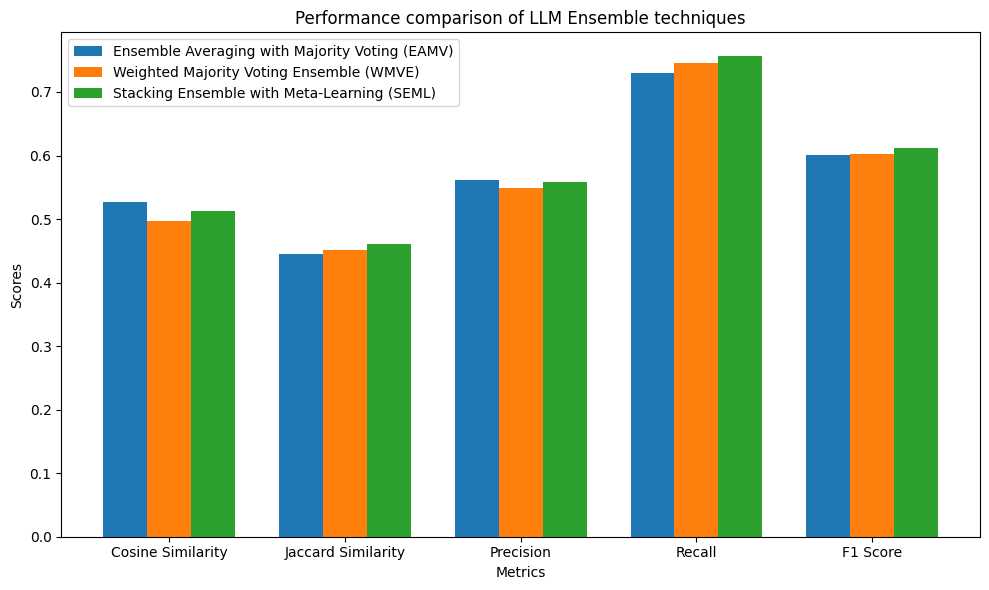

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Majority Voting', 'Bagging', 'Boosting', 'Stacking']
metrics = ['Cosine Similarity', 'Jaccard Similarity', 'Precision', 'Recall', 'F1 Score']
majority_voting_scores = []
bagging_scores = [0.5262, 0.4445, 0.5617, 0.7305, 0.6011]
boosting_scores = [0.4977, 0.4517, 0.5490, 0.7452, 0.6024]
stacking_scores = [0.5134, 0.4606, 0.5591, 0.7561, 0.6126]

# Plotting
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, bagging_scores, width, label='Ensemble Averaging with Majority Voting (EAMV)')
rects2 = ax.bar(x, boosting_scores, width, label='Weighted Majority Voting Ensemble (WMVE)')
rects3 = ax.bar(x + width, stacking_scores, width, label='Stacking Ensemble with Meta-Learning (SEML)')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance comparison of LLM Ensemble techniques')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()

plt.show()


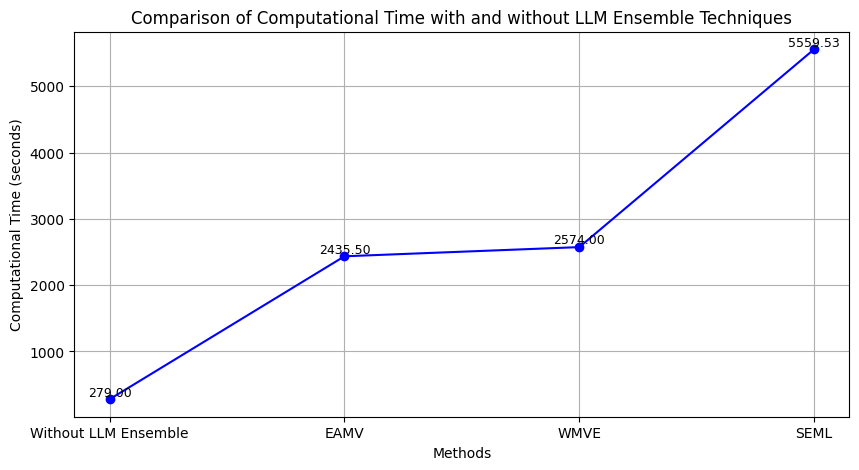

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Without LLM Ensemble', 'EAMV',
           'WMVE', 'SEML']
times = [279.00, 2435.50, 2574.00, 5559.53]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(methods, times, marker='o', color='blue')
for i, time in enumerate(times):
    plt.text(i, time + 50, f'{time:.2f}', ha='center', fontsize=9)

plt.title('Comparison of Computational Time with and without LLM Ensemble Techniques')
plt.xlabel('Methods')
plt.ylabel('Computational Time (seconds)')
plt.grid(True)
plt.show()
